<a id=0></a>

# Exploratory Data Analysis

*In this notebook im going to analyze some hypothesis:*

- [1. There is a relation between Air temperature amplitude and Air moisture amplitude](#1)
- [2. There is a relation between Derivate of Air Pression in 24h and air temperature](#2)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.style.use('default')
plt.rcParams.update({'font.size': 16})
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

In [2]:
data = pd.read_csv("DATA111_2DAILY_V1.csv")
data['YEAR'] = data['YEAR'].astype(int)

In [3]:
data.head(2)

,YEAR,DAY365,MAX_N_WNDVEL_5M,DIR_MAX_N_WNDVEL_5M,MIN_N_WNDVEL_5M,DIR_MIN_N_WNDVEL_5M,MEAN_N_WNDVEL_5M,MAX_N_WNDVEL_2M,DIR_MAX_N_WNDVEL_2M,MIN_N_WNDVEL_2M,...,DIR_MIN_N_PRESSION_HPA,MEAN_N_PRESSION_HPA,MAX_N_RAIN_SUM10,DIR_MAX_N_RAIN_SUM10,MIN_N_RAIN_SUM10,DIR_MIN_N_RAIN_SUM10,MEAN_N_RAIN_SUM10,HUMIDEX,MONTH,WEEK
0,1997,1.0,5561.0,9.33,0.892,31.87,2302.065328,3075.0,134.4,0.763,...,181.4,942.831933,0.0,8.32,0.0,8.32,0.0,38.572855,1,0.0
1,1997,2.0,4266.0,154.70,0.363,63.72,1949.374418,2876.0,152.0,0.626,...,125.6,943.809091,0.0,131.60,0.0,131.60,0.0,32.739444,1,0.0


In [4]:
data.columns

Index(['YEAR', 'DAY365', 'MAX_N_WNDVEL_5M', 'DIR_MAX_N_WNDVEL_5M',
       'MIN_N_WNDVEL_5M', 'DIR_MIN_N_WNDVEL_5M', 'MEAN_N_WNDVEL_5M',
       'MAX_N_WNDVEL_2M', 'DIR_MAX_N_WNDVEL_2M', 'MIN_N_WNDVEL_2M',
       'DIR_MIN_N_WNDVEL_2M', 'MEAN_N_WNDVEL_2M', 'MAX_N_WNDDIR_DEGREE',
       'DIR_MAX_N_WNDDIR_DEGREE', 'MIN_N_WNDDIR_DEGREE',
       'DIR_MIN_N_WNDDIR_DEGREE', 'MEAN_N_WNDDIR_DEGREE', 'MAX_N_INCRAD_10MSR',
       'DIR_MAX_N_INCRAD_10MSR', 'MIN_N_INCRAD_10MSR',
       'DIR_MIN_N_INCRAD_10MSR', 'MEAN_N_INCRAD_10MSR', 'MAX_N_REFRAD_10MSR',
       'DIR_MAX_N_REFRAD_10MSR', 'MIN_N_REFRAD_10MSR',
       'DIR_MIN_N_REFRAD_10MSR', 'MEAN_N_REFRAD_10MSR', 'MAX_N_PHTFLOW_10MSR',
       'DIR_MAX_N_PHTFLOW_10MSR', 'MIN_N_PHTFLOW_10MSR',
       'DIR_MIN_N_PHTFLOW_10MSR', 'MEAN_N_PHTFLOW_10MSR',
       'MAX_N_NHTFLOW_10MSR', 'DIR_MAX_N_NHTFLOW_10MSR', 'MIN_N_NHTFLOW_10MSR',
       'DIR_MIN_N_NHTFLOW_10MSR', 'MEAN_N_NHTFLOW_10MSR', 'MAX_N_AIRMTR_PCT10',
       'DIR_MAX_N_AIRMTR_PCT10', 'MIN_N_AIRM

<a id=1></a>

# 1. There is a relation between Air temperature amplitude and Air moisture amplitude

Second hypothesis: Larger thermal amplitude has less value of moisture than others

In [5]:
#Creating thermal amplitude and moisture amplitude variables

data['N_THERMAMP'] = data['MAX_N_AIRTMP_MED10'] - data['MIN_N_AIRTMP_MED10']

print(data[data['N_THERMAMP'] < 0].shape[0])

data['N_MTRAMP'] = data['MAX_N_AIRMTR_PCT10'] - data['MIN_N_AIRMTR_PCT10']

print(data[data['N_MTRAMP'] < 0].shape[0])

0
0


### Data visualization

c:\users\hideki\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


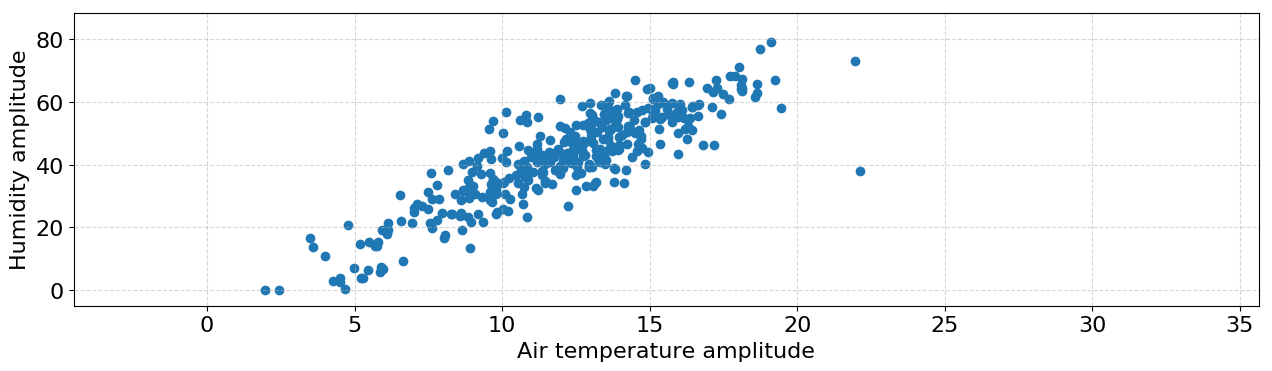

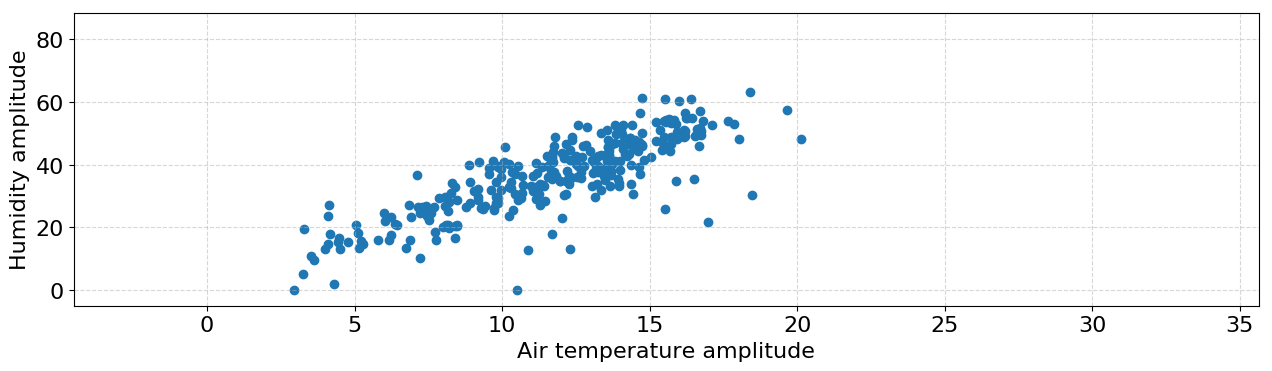

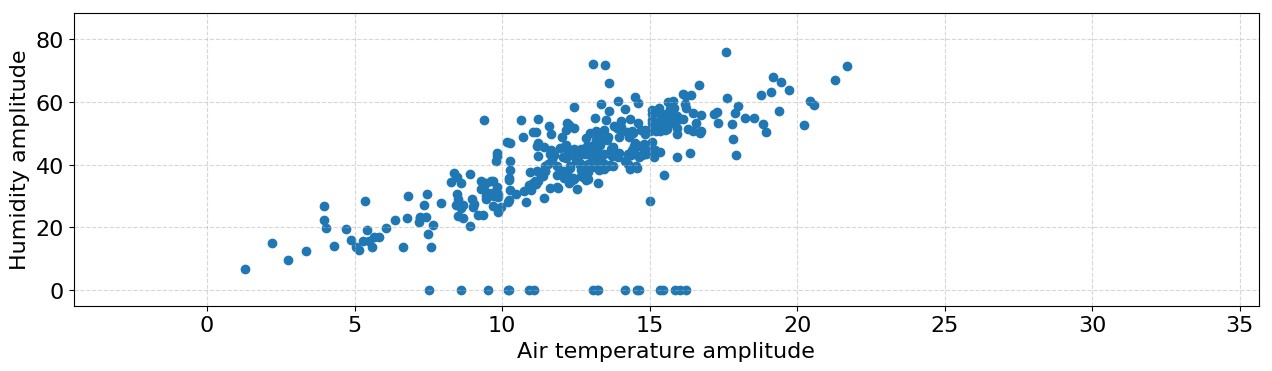

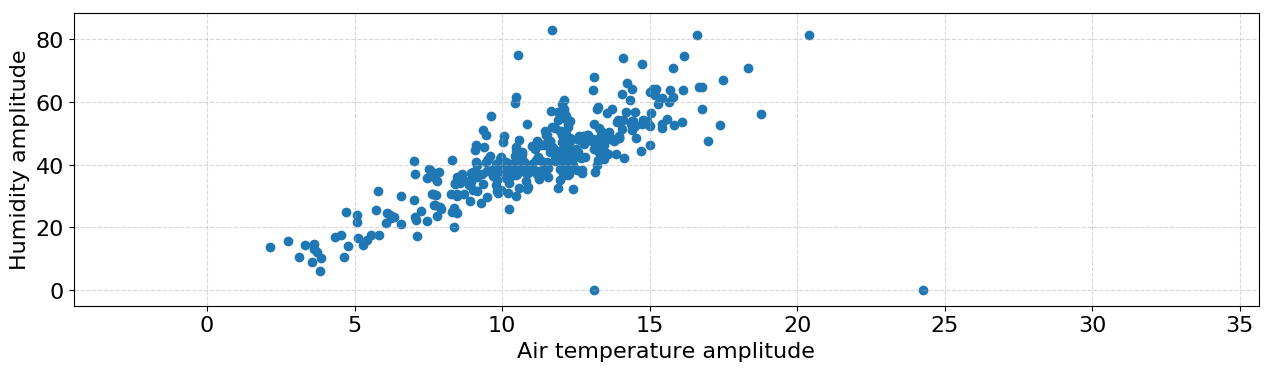

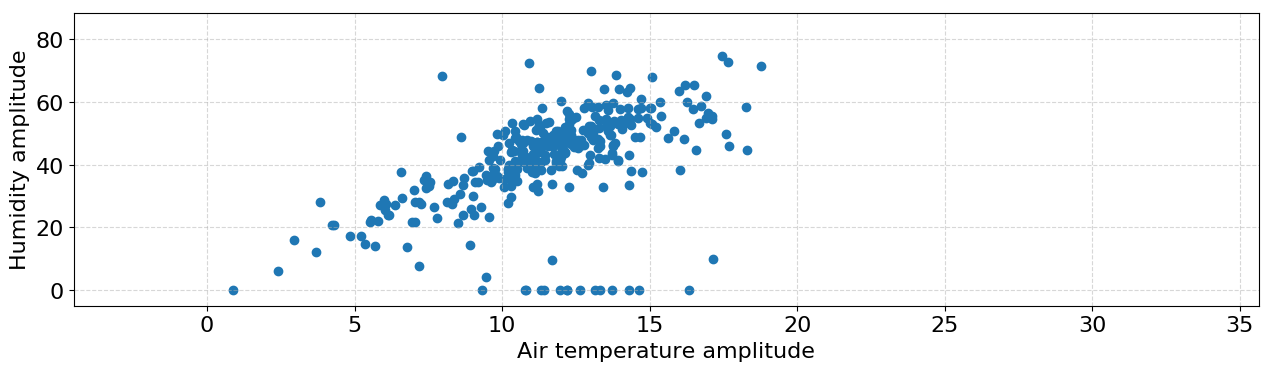

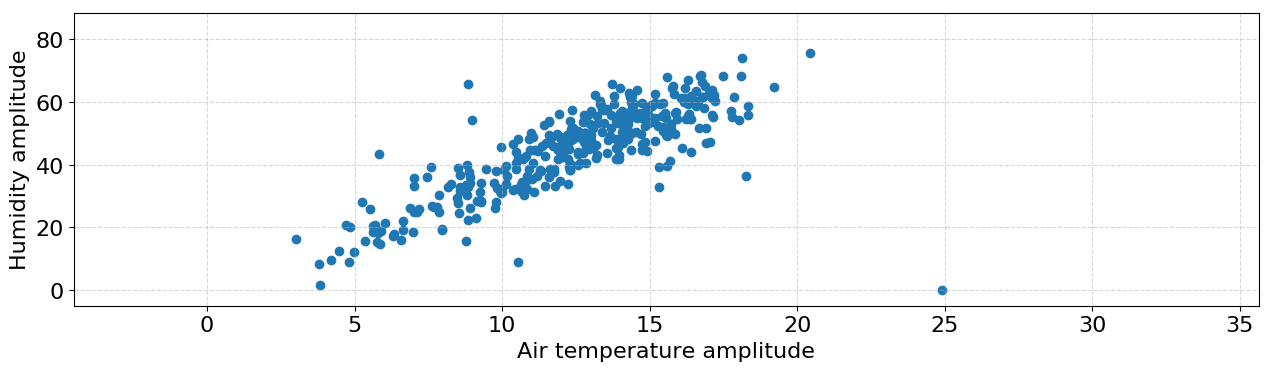

fig/TEMP_AMP_UMID_AMP_2003


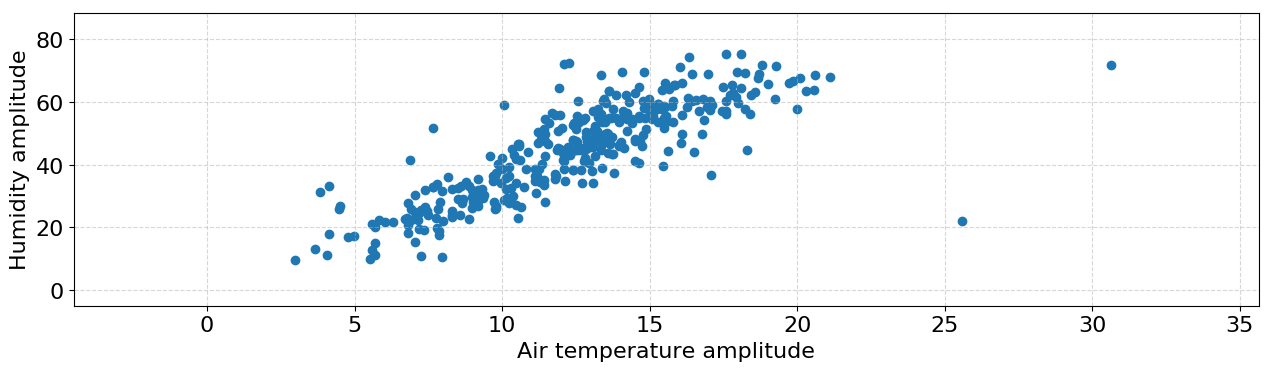

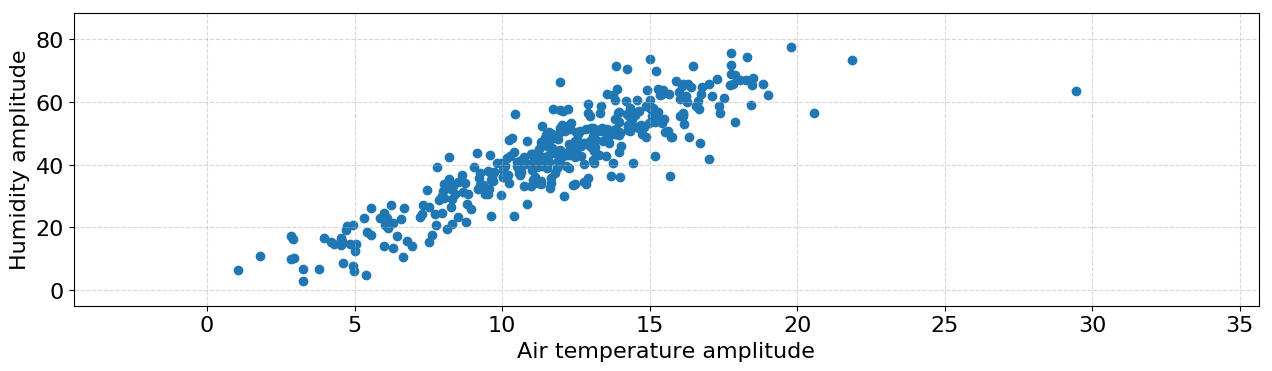

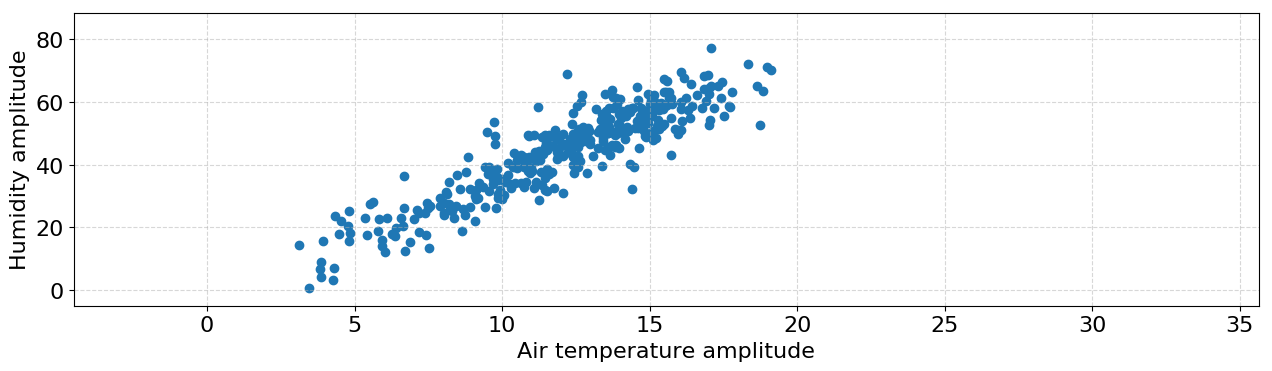

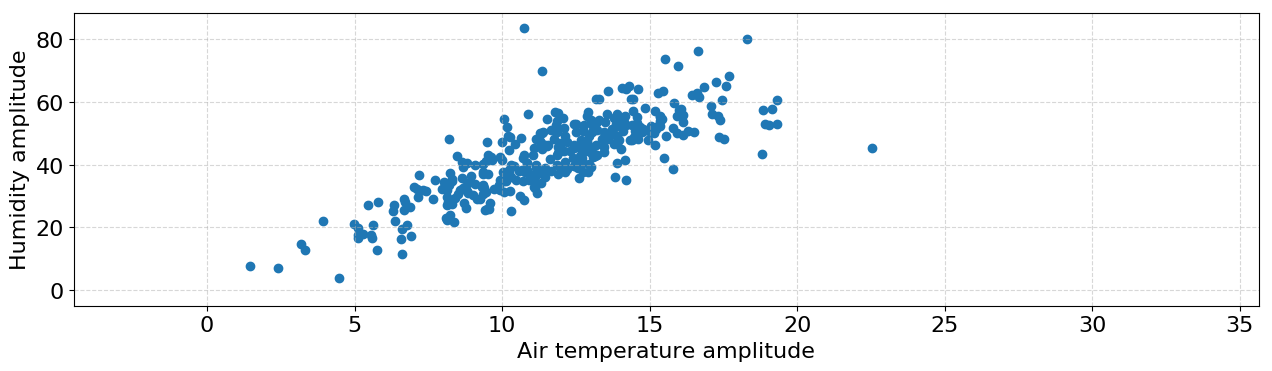

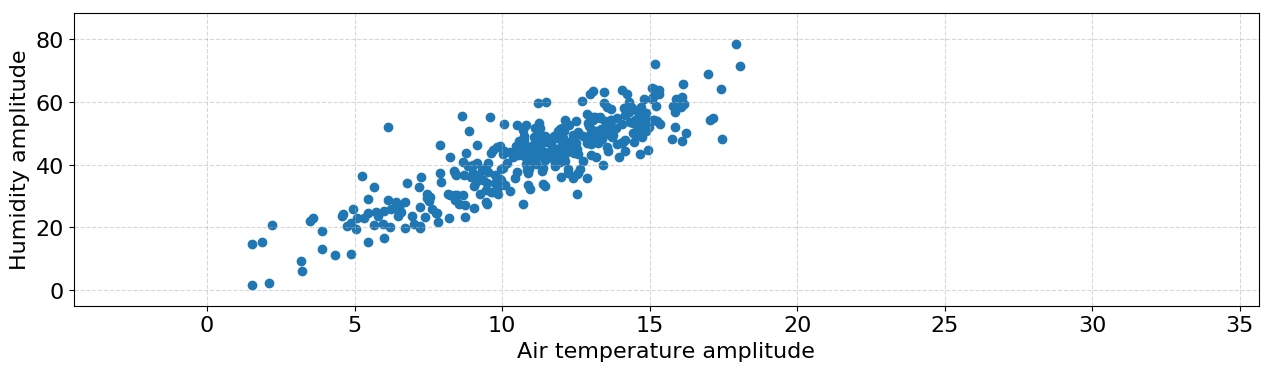

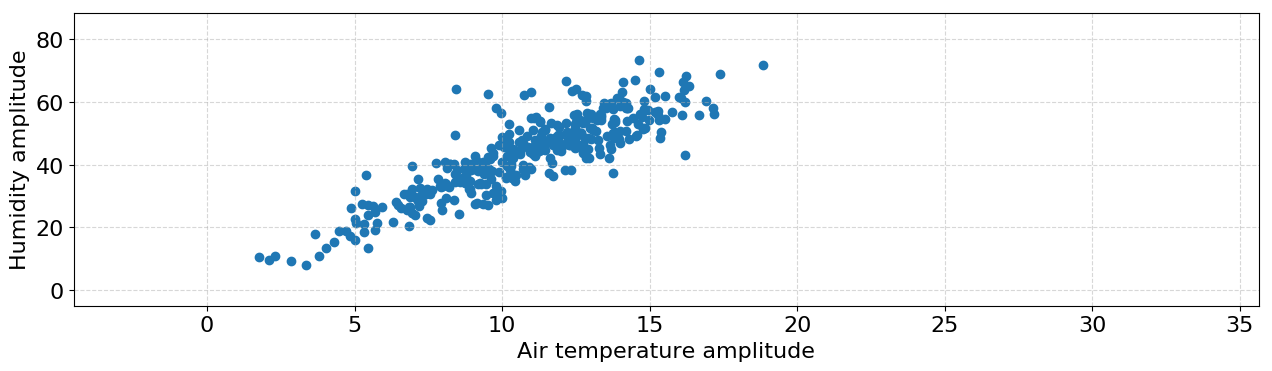

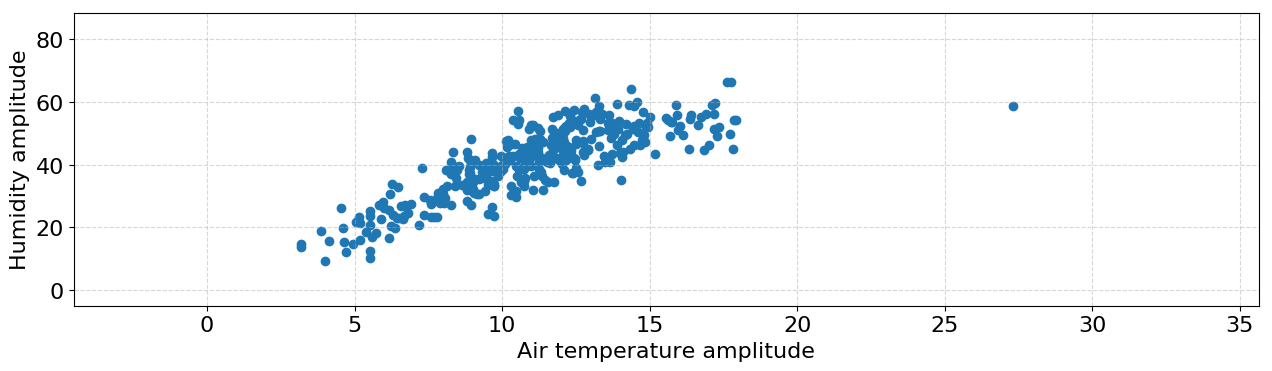

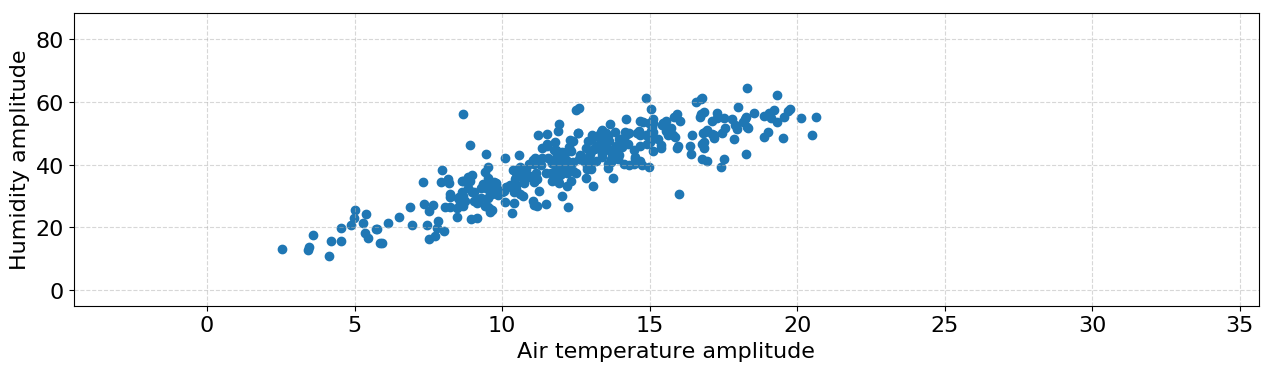

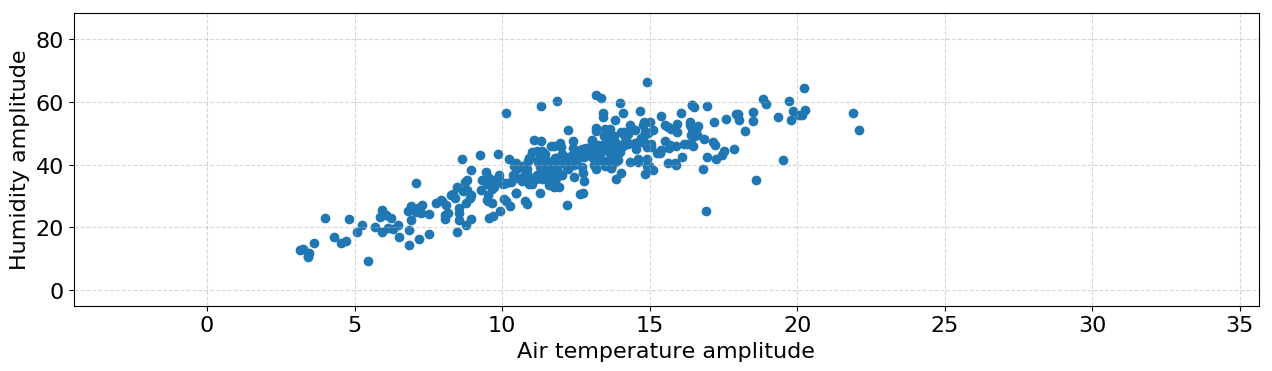

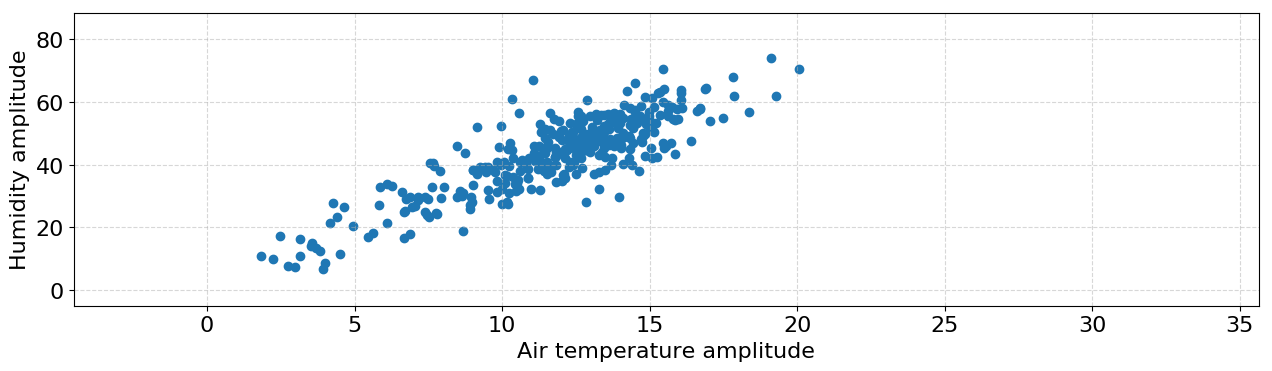

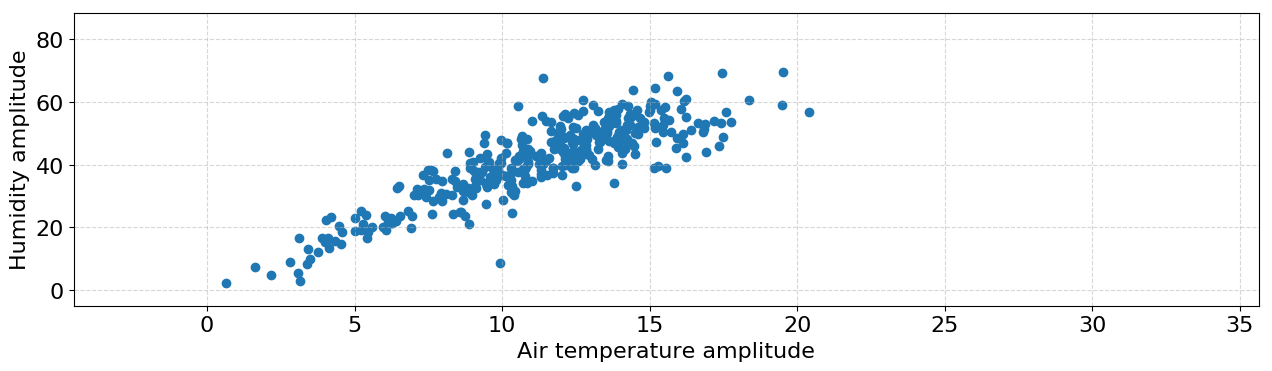

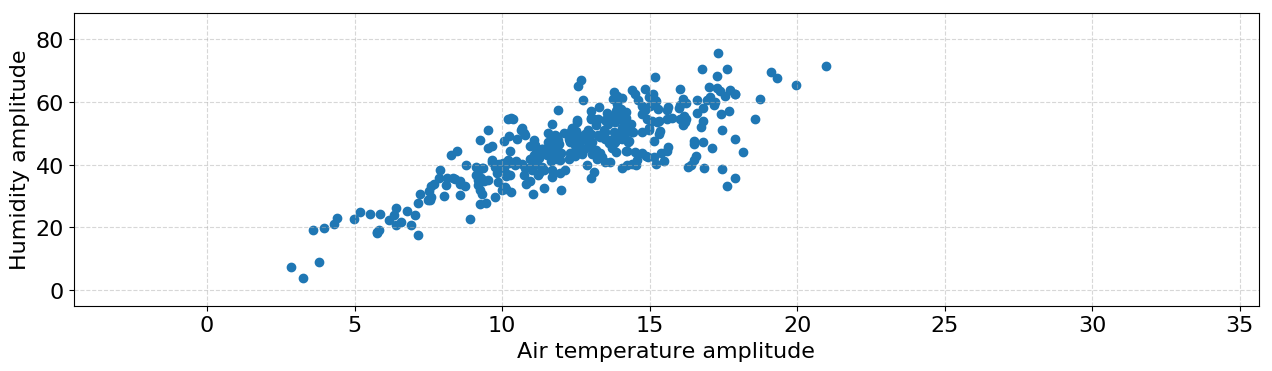

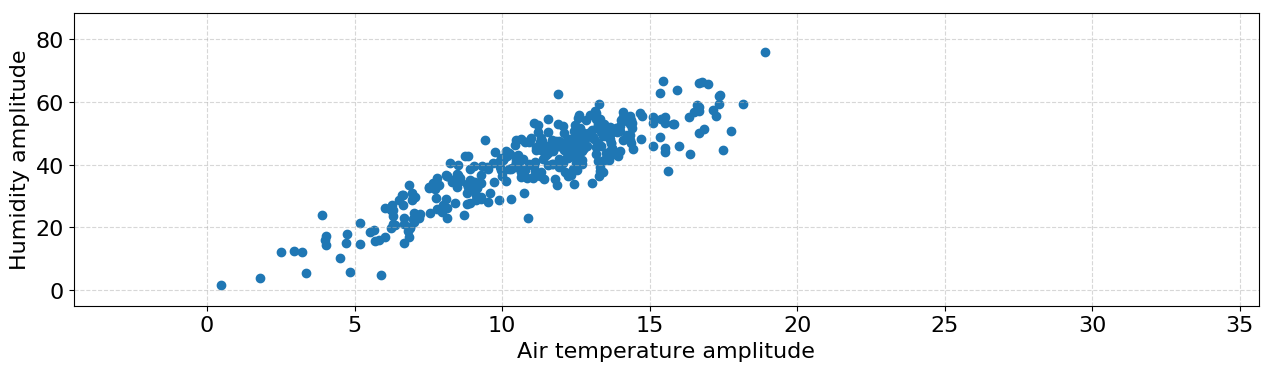

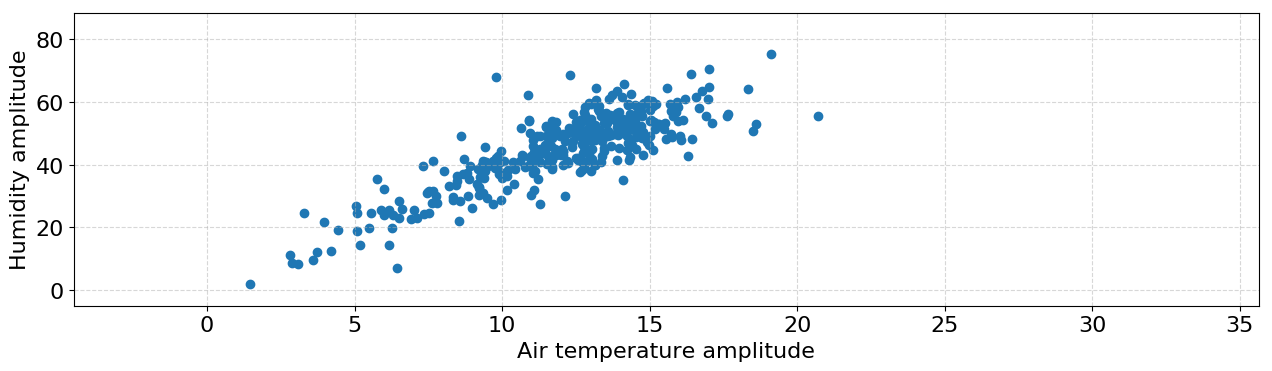

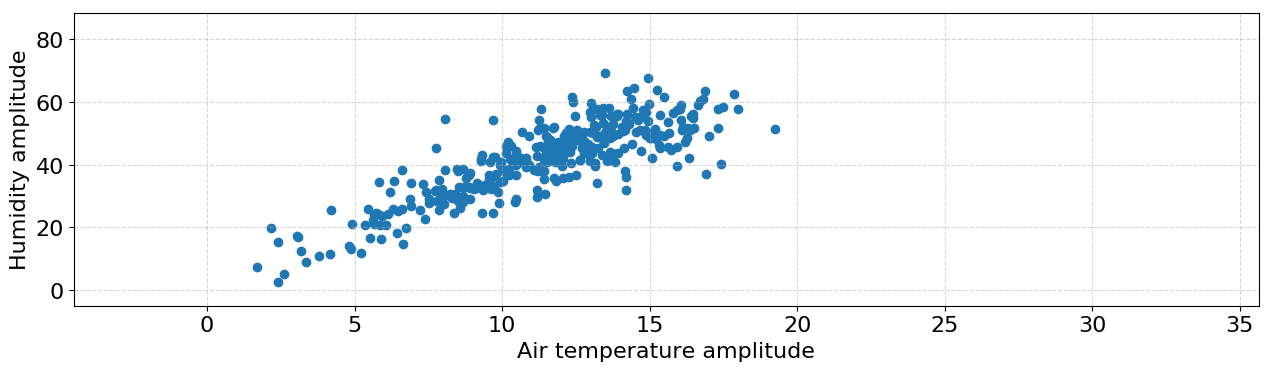

fig/TEMP_AMP_UMID_AMP_2018


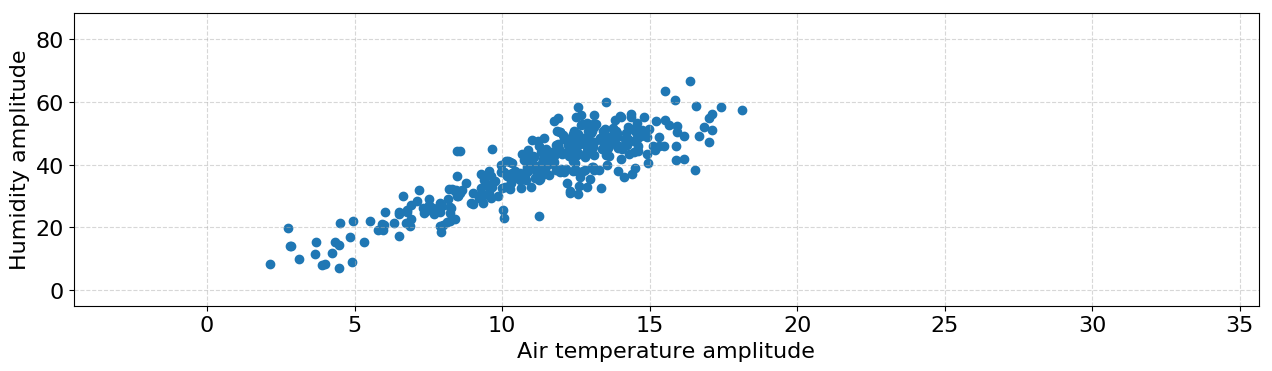

In [6]:
var1 = 'N_THERMAMP'
var2 = 'N_MTRAMP'

min_x_value = data[var1].min() - 5
max_x_value = data[var1].max() + 5

min_y_value = data[var2].min() - 5
max_y_value = data[var2].max() + 5

for i in data['YEAR'].unique():
    data_2plot = data[(data['YEAR'] == i)]

    plt.figure(figsize=(13,4))
#     plt.title(str(i))    
    plt.scatter(data_2plot[var1], data_2plot[var2])
    plt.xlabel('Air temperature amplitude')
    plt.ylabel('Humidity amplitude')
    plt.grid(True, linestyle='--', alpha = 0.5)
    plt.xlim(min_x_value, max_x_value)
    plt.ylim(min_y_value, max_y_value)
    
    if((i == 2018)|(i == 2003)):
        str_name = 'fig/TEMP_AMP_UMID_AMP_' + str(int(i))
        print(str_name)
        plt.savefig(str_name)
    plt.show()

It seems to have a high correlation, lets check below:

In [7]:
# Checking correlation

data[['N_THERMAMP','N_MTRAMP']].corr()

,N_THERMAMP,N_MTRAMP
N_THERMAMP,1.000000,0.802947
N_MTRAMP,0.802947,1.000000


There is a high spearman correlation

### The second hypothesis is that: Days with larger temperature amplitude have a bigger minimum of air moistre 

Lets check it by visualizing the scatter plot of thermal amplitude and the mean moisture of the day

c:\users\hideki\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


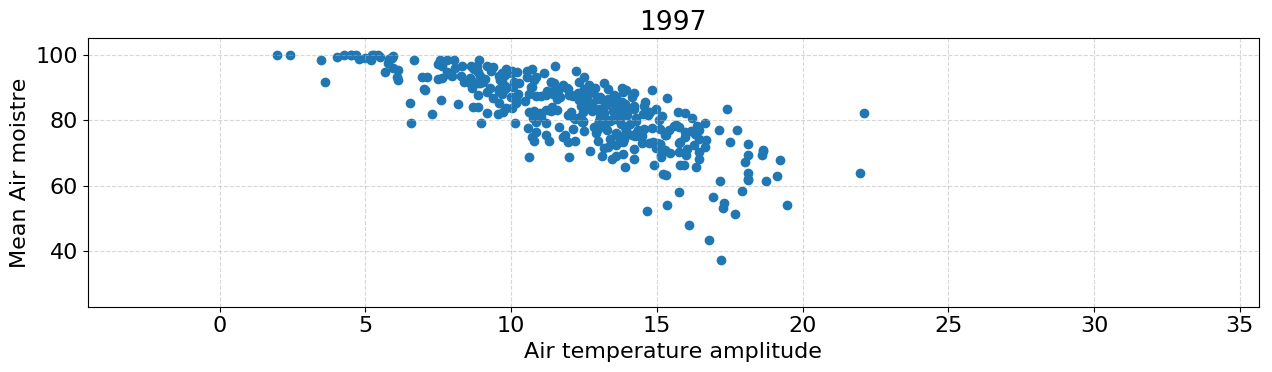

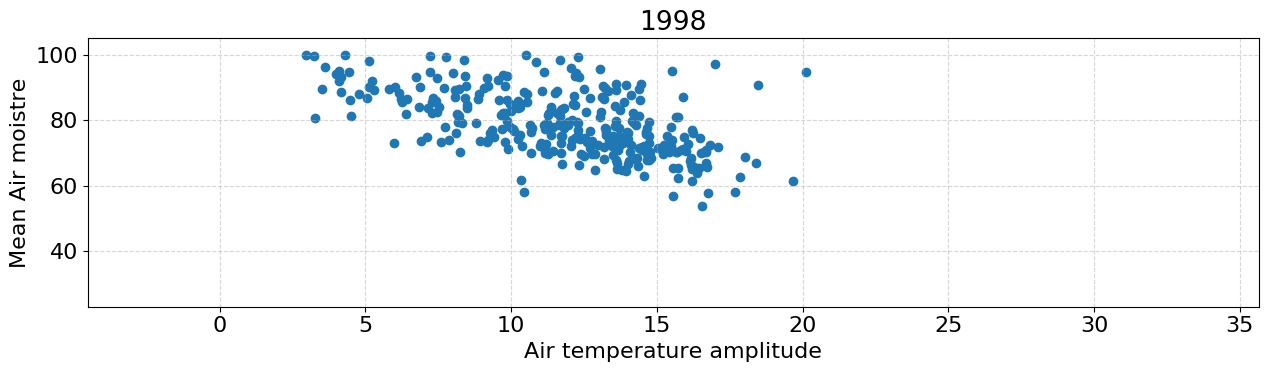

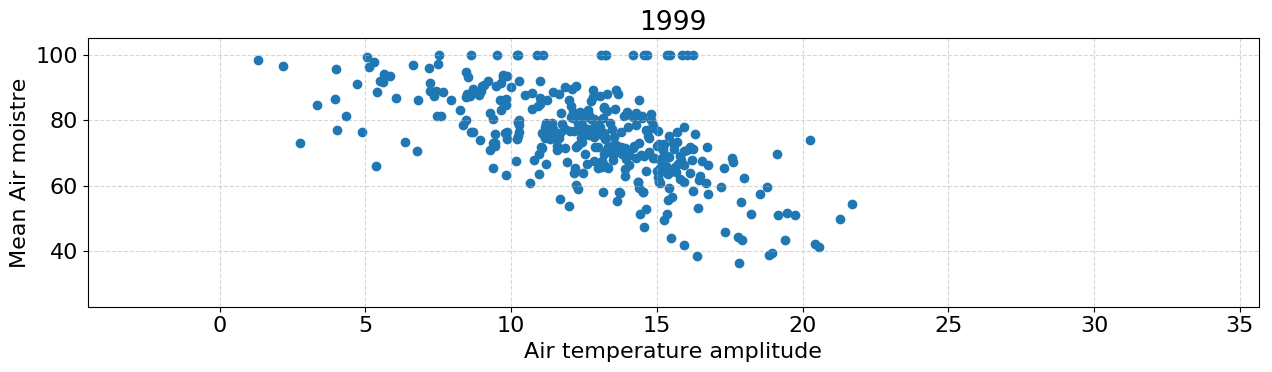

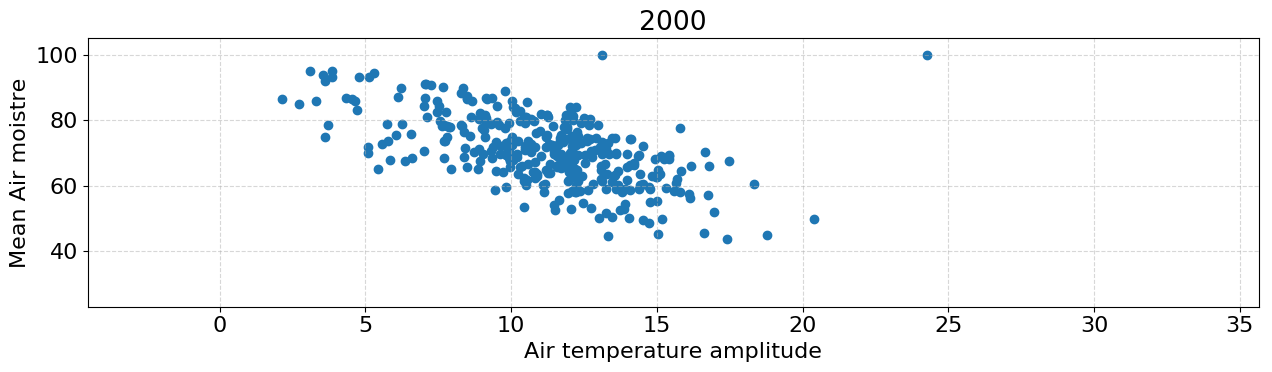

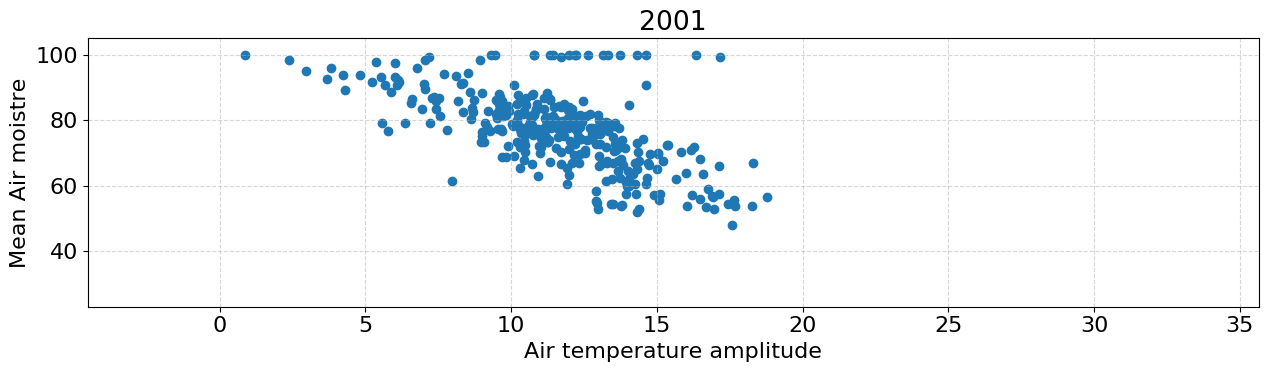

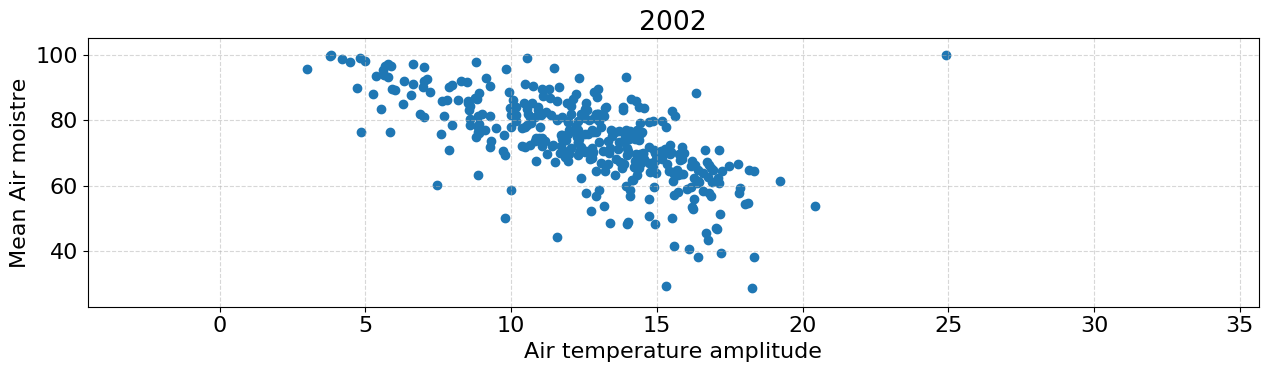

fig/TEMP_AMP_UMID_MIN_2003


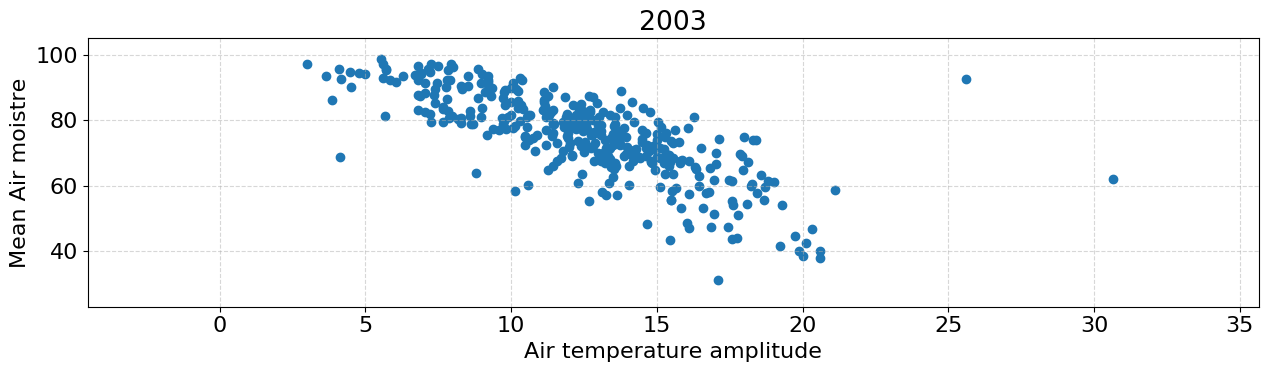

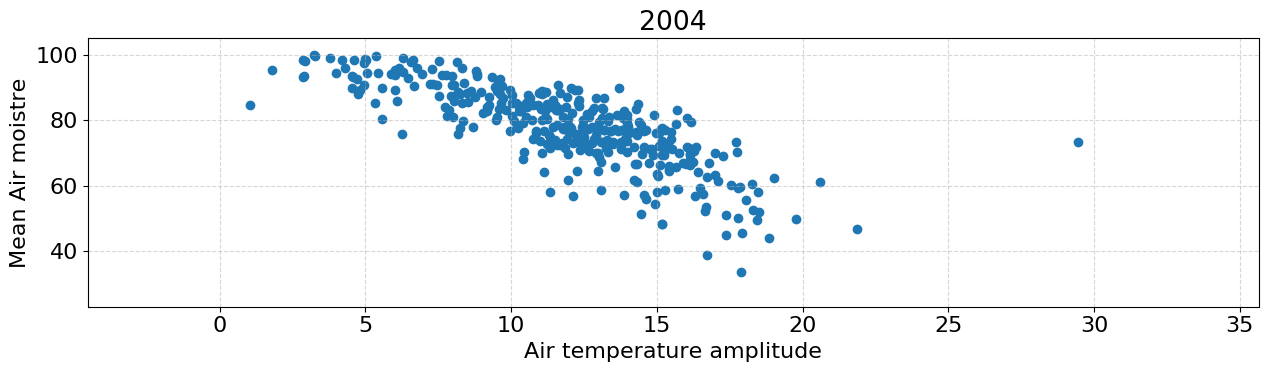

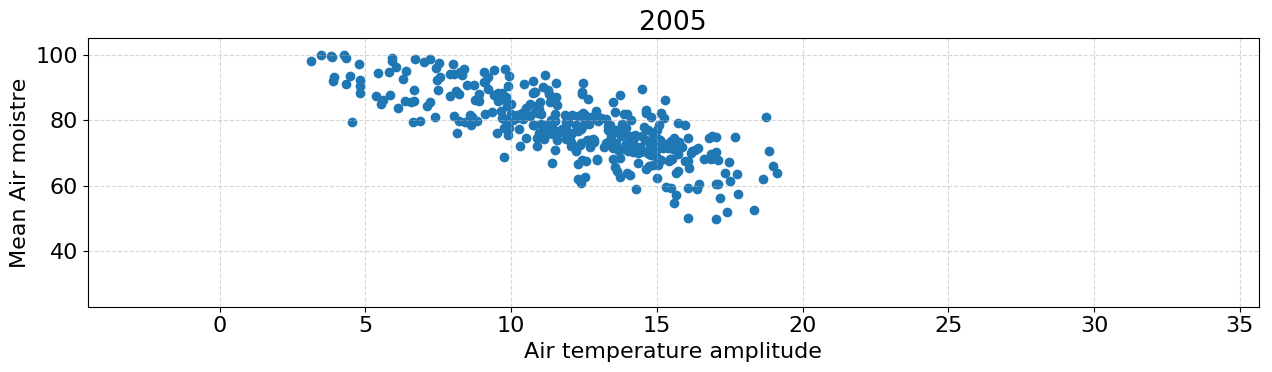

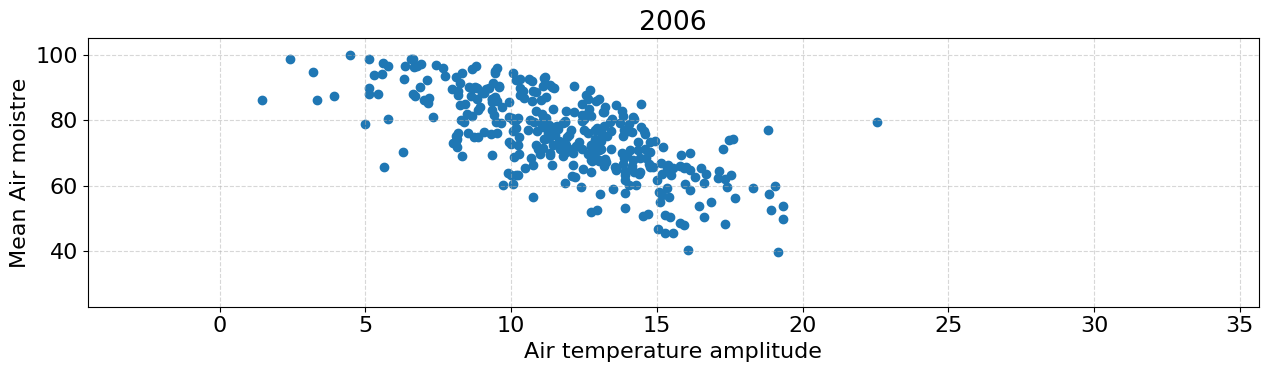

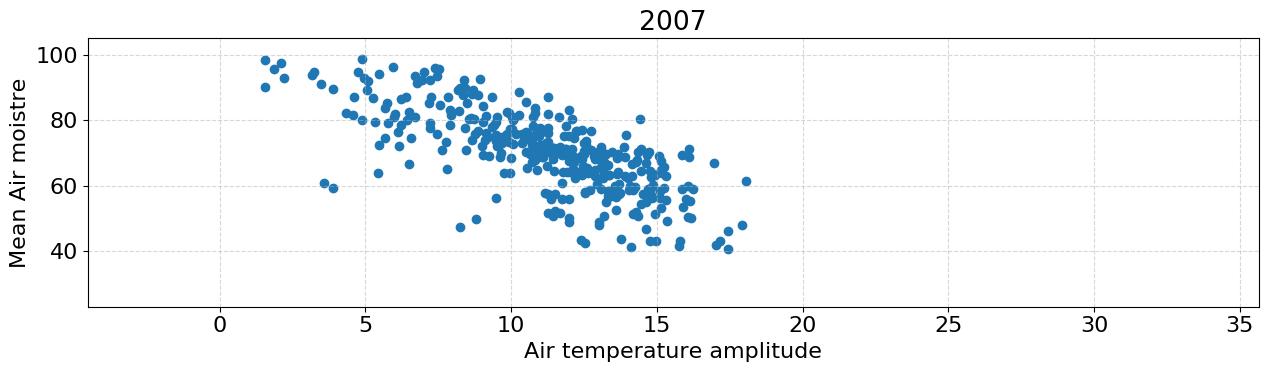

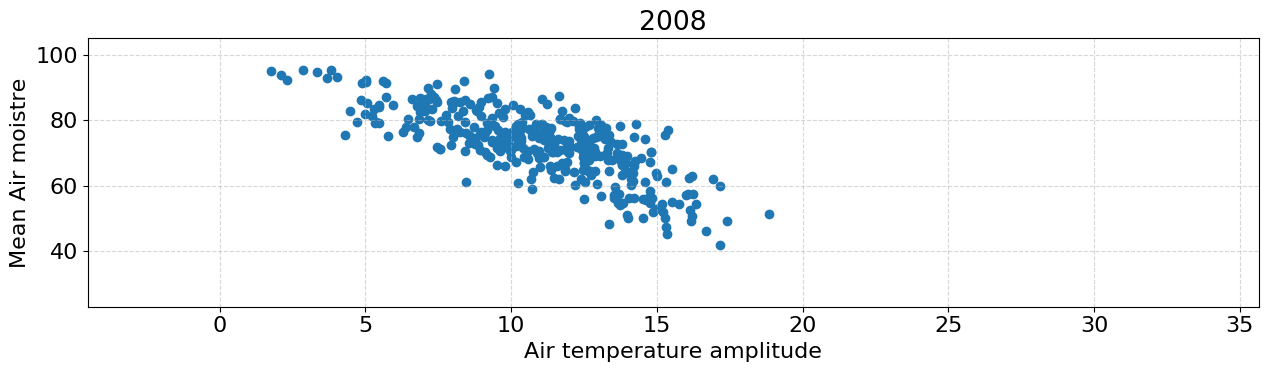

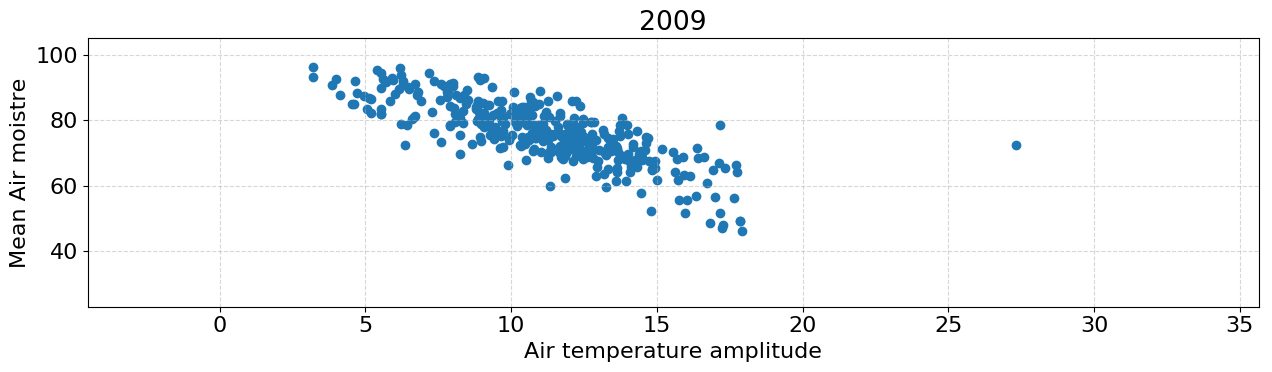

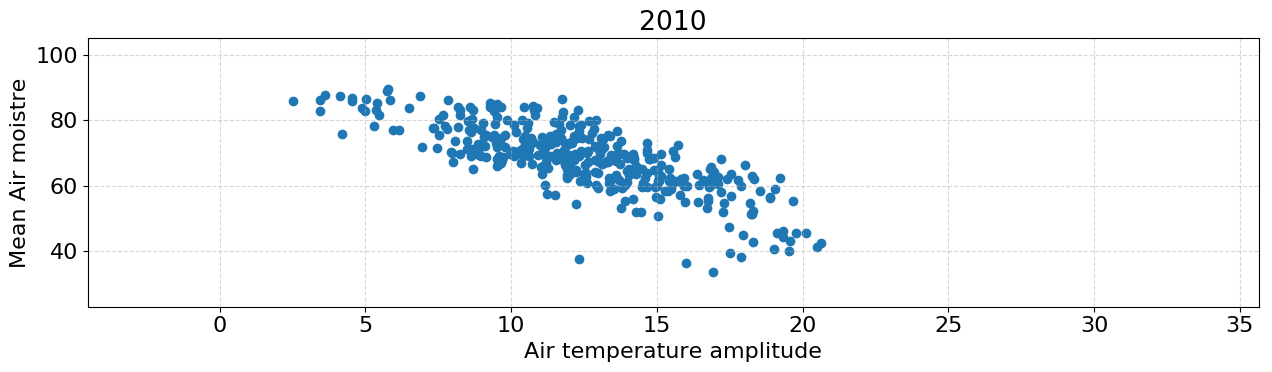

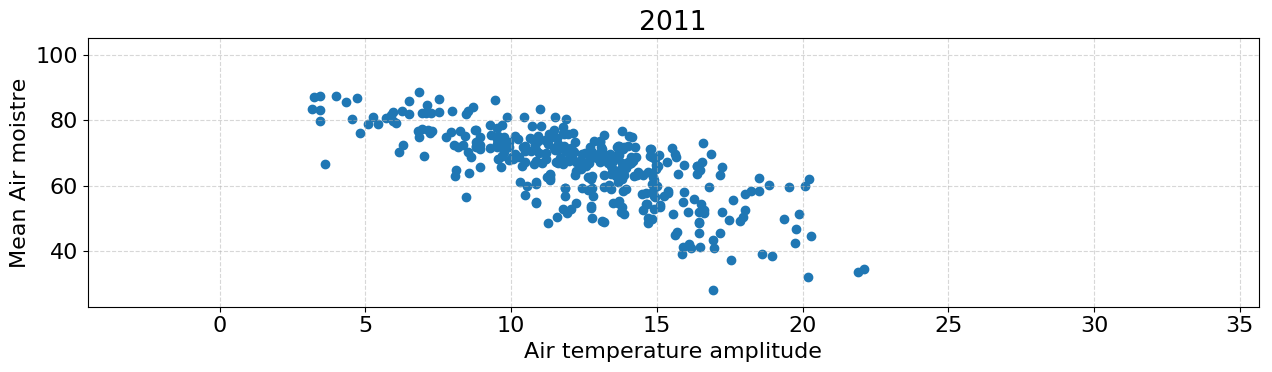

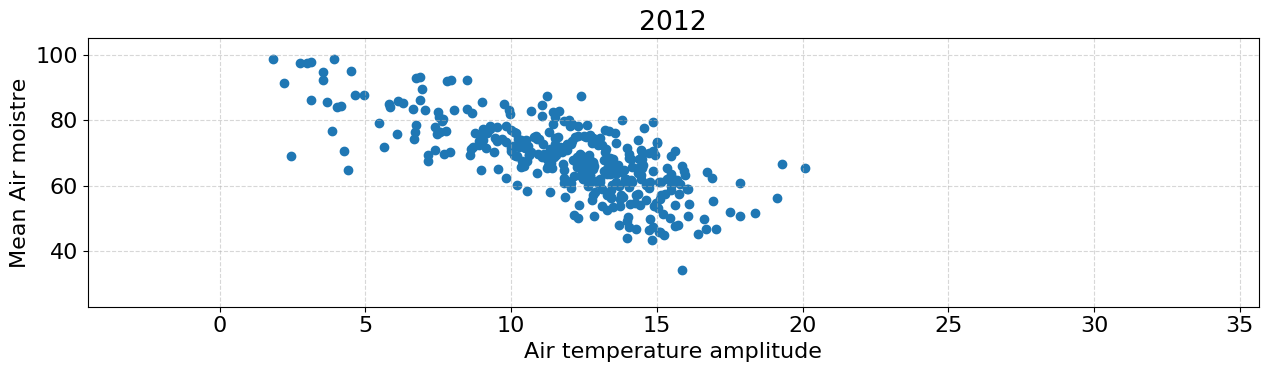

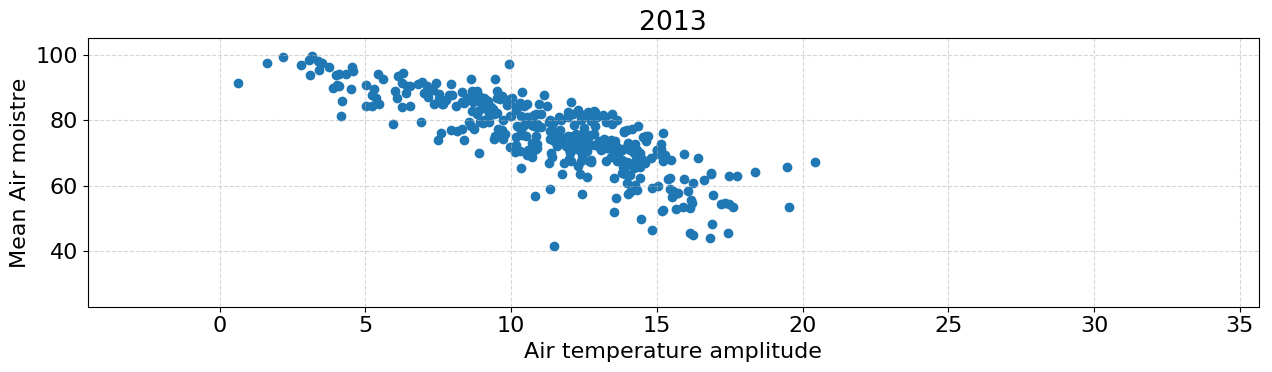

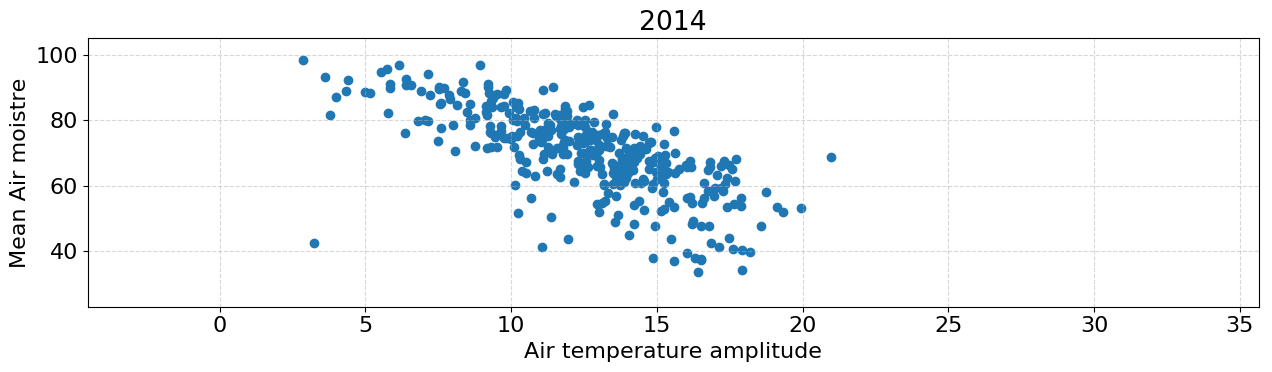

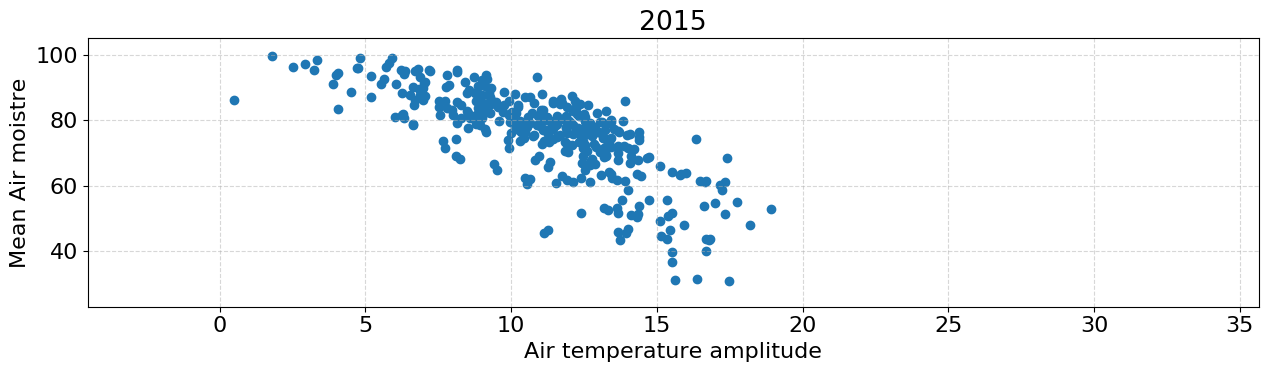

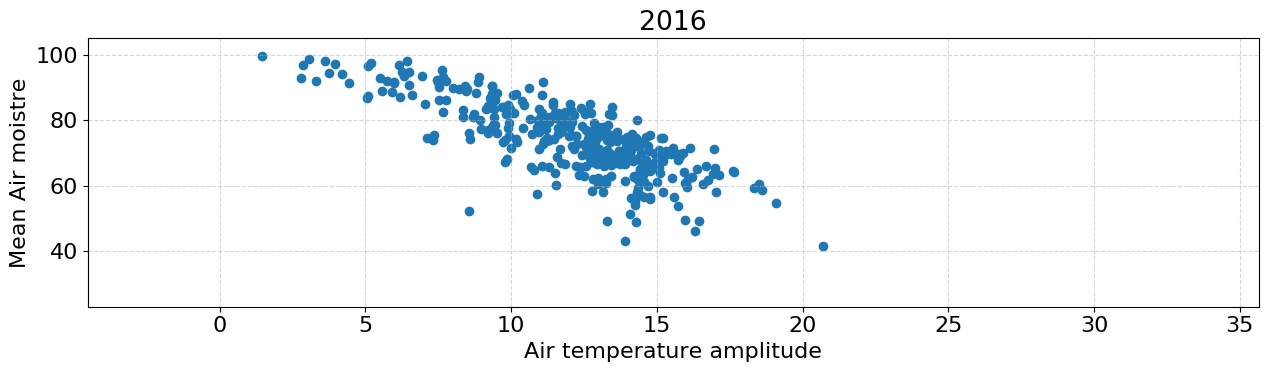

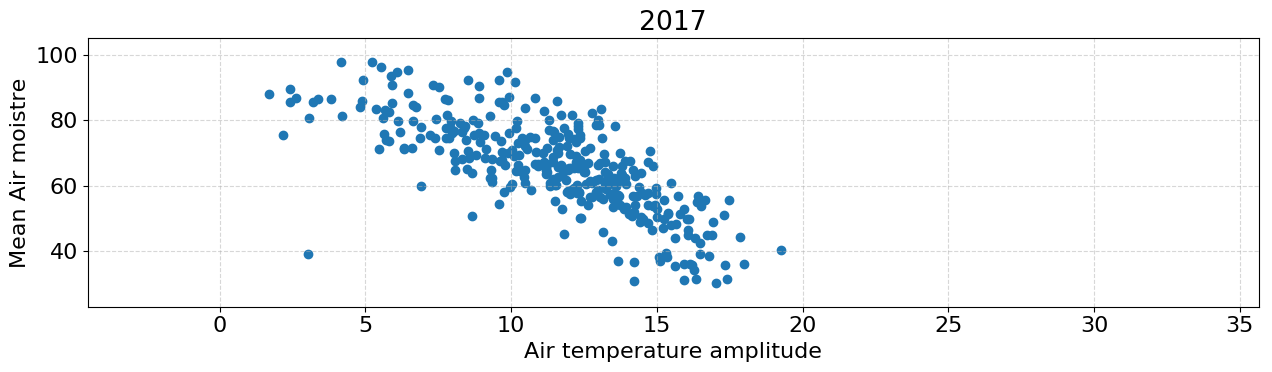

fig/TEMP_AMP_UMID_MIN_2018


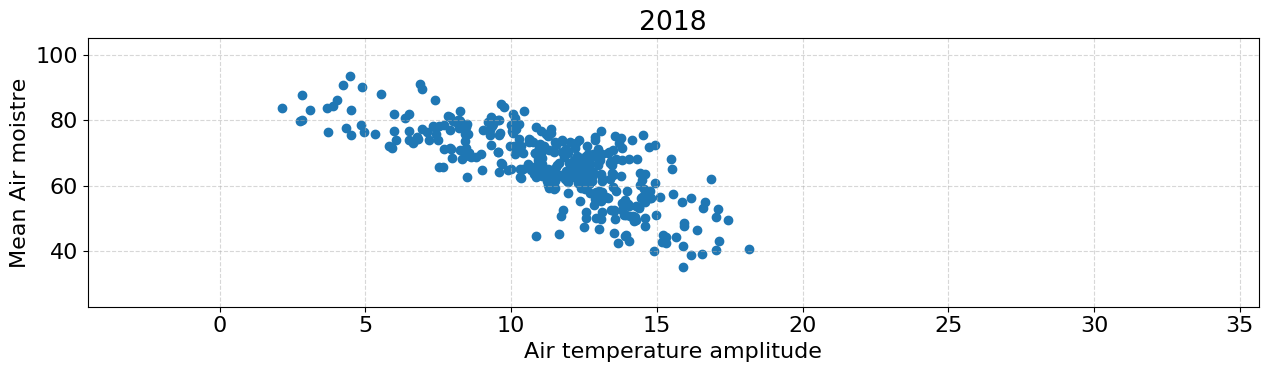

In [8]:
var1 = 'N_THERMAMP'
var2 = 'MEAN_N_AIRMTR_PCT10'

min_x_value = data[var1].min() - 5
max_x_value = data[var1].max() + 5

min_y_value = data[var2].min() - 5
max_y_value = data[var2].max() + 5


for i in data['YEAR'].unique():
    data_2plot = data[(data['YEAR'] == i)]

    plt.figure(figsize=(13,4))
    plt.title(str(i))    
    plt.scatter(data_2plot[var1], data_2plot[var2])
    plt.xlabel('Air temperature amplitude')
    plt.ylabel('Mean Air moistre')
    plt.grid(True, linestyle='--', alpha = 0.5)
    plt.xlim(min_x_value, max_x_value)
    plt.ylim(min_y_value, max_y_value)
    if((i == 2018)|(i == 2003)):
        str_name = 'fig/TEMP_AMP_UMID_MIN_' + str(int(i))
        print(str_name)
        plt.savefig(str_name)
    plt.show()

In [9]:
# Checking correlation

data[['N_THERMAMP','MEAN_N_AIRMTR_PCT10']].corr()

,N_THERMAMP,MEAN_N_AIRMTR_PCT10
N_THERMAMP,1.000000,-0.658603
MEAN_N_AIRMTR_PCT10,-0.658603,1.000000


### Bin analysis of mean air moisture by thermal amplitudes bin

In [10]:
print(data['N_THERMAMP'].min(), data['N_THERMAMP'].max())

0.48 30.64


In [11]:
print(data['N_THERMAMP'].quantile(0.20), data['N_THERMAMP'].quantile(0.40) ,data['N_THERMAMP'].quantile(0.60), data['N_THERMAMP'].quantile(0.80))

9.059999999999999 11.260000000000002 12.809999999999999 14.49


In [12]:
data[data['N_THERMAMP']> 25]

,YEAR,DAY365,MAX_N_WNDVEL_5M,DIR_MAX_N_WNDVEL_5M,MIN_N_WNDVEL_5M,DIR_MIN_N_WNDVEL_5M,MEAN_N_WNDVEL_5M,MAX_N_WNDVEL_2M,DIR_MAX_N_WNDVEL_2M,MIN_N_WNDVEL_2M,...,MAX_N_RAIN_SUM10,DIR_MAX_N_RAIN_SUM10,MIN_N_RAIN_SUM10,DIR_MIN_N_RAIN_SUM10,MEAN_N_RAIN_SUM10,HUMIDEX,MONTH,WEEK,N_THERMAMP,N_MTRAMP
2370,2003,258.0,4541.0,153.2,0.539,7.86,1552.536297,4541.0,138.8,0.539,...,0.000,138.1,0.0,138.1,0.000000,54.333648,9,36.0,30.64,71.86
2371,2003,259.0,3128.0,252.9,0.000,142.50,560.287489,3128.0,252.9,0.000,...,0.000,114.2,0.0,114.2,0.000000,54.000000,9,37.0,25.60,22.10
2716,2004,239.0,6188.0,130.1,0.000,76.40,1466.845830,5482.0,129.6,0.000,...,0.000,76.4,0.0,76.4,0.000000,54.000000,8,34.0,29.46,63.64
4421,2009,133.0,3364.0,348.9,0.000,116.40,442.378108,2658.0,345.0,0.000,...,0.254,356.8,0.0,116.4,0.001827,59.861605,5,19.0,27.33,58.69


In [13]:
def get_bins(x):
    if((x > 0) & (x <= 9.082000000000003)):
        return '0.48 - 9.1'
    elif((x > 9.082000000000003) & (x <= 11.27)):
        return '9.1 - 11.27'
    elif((x > 11.27) & (x <= 12.84)):
        return '11.27 - 12.84'
    elif((x > 12.84) & (x <= 14.548000000000002)):
        return '12.84 - 14.55'
    else:
        return '14.55 - 30.64'

In [14]:
data['BIN_N_THERMAMP'] = data['N_THERMAMP'].map(get_bins)

c:\users\hideki\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


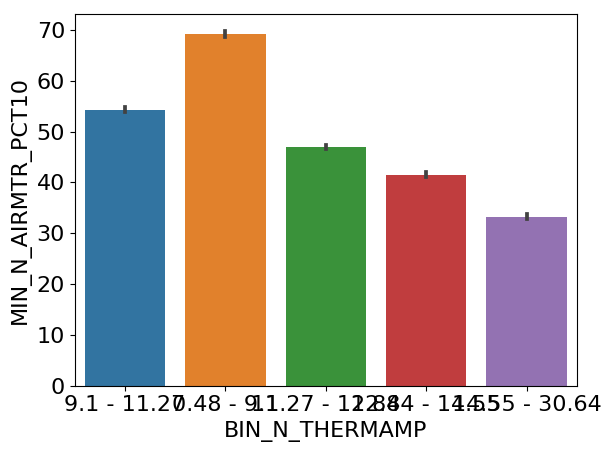

In [15]:
sns.barplot(data['BIN_N_THERMAMP'], data['MIN_N_AIRMTR_PCT10'], estimator=np.mean)

The hypothesis is true, most of the minimum values of air moisture is concentrated in high thermal amplitudes.

Keep attention because the orange bin is the minor value of Thermal Amplitude

[Main menu](#0)

<a id=2></a>

# 2. There is a relation between derivate of Air Pression in 24h and air temperature

In [16]:
data.head(2)

,YEAR,DAY365,MAX_N_WNDVEL_5M,DIR_MAX_N_WNDVEL_5M,MIN_N_WNDVEL_5M,DIR_MIN_N_WNDVEL_5M,MEAN_N_WNDVEL_5M,MAX_N_WNDVEL_2M,DIR_MAX_N_WNDVEL_2M,MIN_N_WNDVEL_2M,...,DIR_MAX_N_RAIN_SUM10,MIN_N_RAIN_SUM10,DIR_MIN_N_RAIN_SUM10,MEAN_N_RAIN_SUM10,HUMIDEX,MONTH,WEEK,N_THERMAMP,N_MTRAMP,BIN_N_THERMAMP
0,1997,1.0,5561.0,9.33,0.892,31.87,2302.065328,3075.0,134.4,0.763,...,8.32,0.0,8.32,0.0,38.572855,1,0.0,10.86,39.33,9.1 - 11.27
1,1997,2.0,4266.0,154.70,0.363,63.72,1949.374418,2876.0,152.0,0.626,...,131.60,0.0,131.60,0.0,32.739444,1,0.0,6.58,21.89,0.48 - 9.1


In [17]:
data.shift(-1).head(2)

,YEAR,DAY365,MAX_N_WNDVEL_5M,DIR_MAX_N_WNDVEL_5M,MIN_N_WNDVEL_5M,DIR_MIN_N_WNDVEL_5M,MEAN_N_WNDVEL_5M,MAX_N_WNDVEL_2M,DIR_MAX_N_WNDVEL_2M,MIN_N_WNDVEL_2M,...,DIR_MAX_N_RAIN_SUM10,MIN_N_RAIN_SUM10,DIR_MIN_N_RAIN_SUM10,MEAN_N_RAIN_SUM10,HUMIDEX,MONTH,WEEK,N_THERMAMP,N_MTRAMP,BIN_N_THERMAMP
0,1997.0,2.0,4266.0,154.7,0.363,63.72,1949.374418,2876.0,152.0,0.626,...,131.6,0.0,131.6,0.0,32.739444,1.0,0.0,6.58,21.89,0.48 - 9.1
1,1997.0,3.0,4835.0,162.4,2.050,131.10,2560.208496,2907.0,94.8,0.717,...,148.2,0.0,148.2,0.0,31.917413,1.0,0.0,7.28,26.81,0.48 - 9.1


In [18]:
# Creating derivate variable of Pression, by a directly variation and by a numpy gradient function

data['1DERIVATE_MEAN_N_PRESSION_HPA'] = data['MEAN_N_PRESSION_HPA'].diff(-1)/data['MEAN_N_PRESSION_HPA']
data['2DERIVATE_MEAN_N_PRESSION_HPA'] = np.gradient(data['MEAN_N_PRESSION_HPA'].values)

c:\users\hideki\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


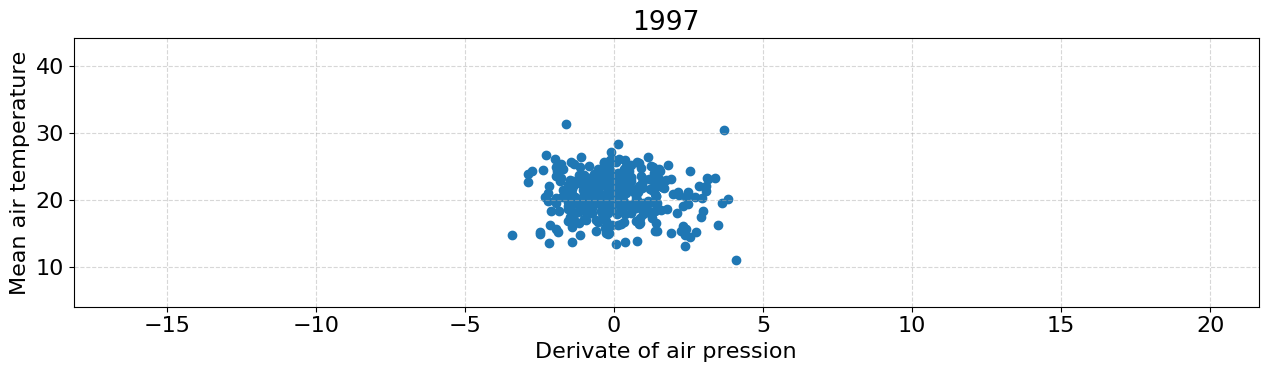

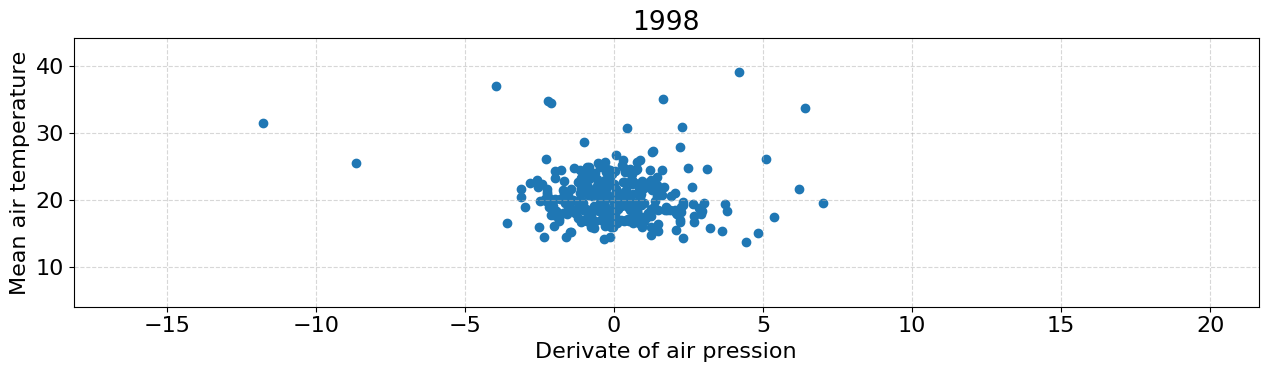

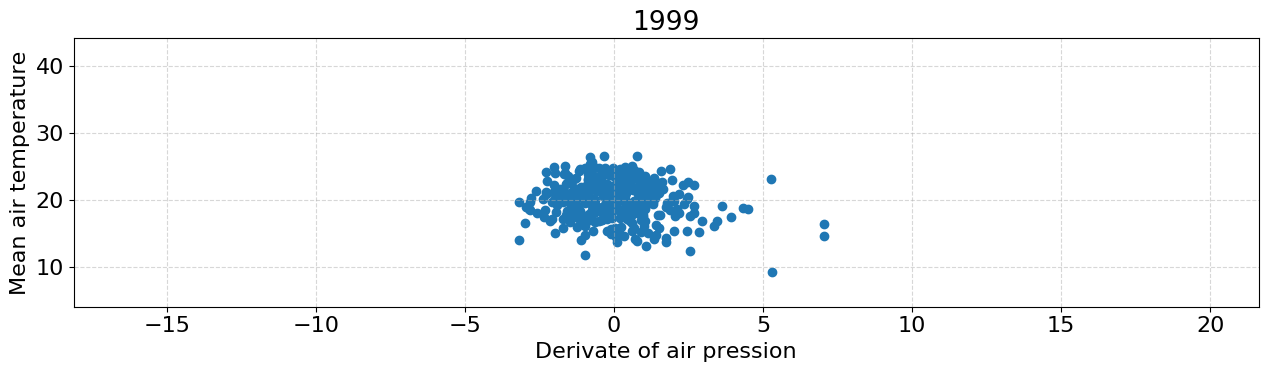

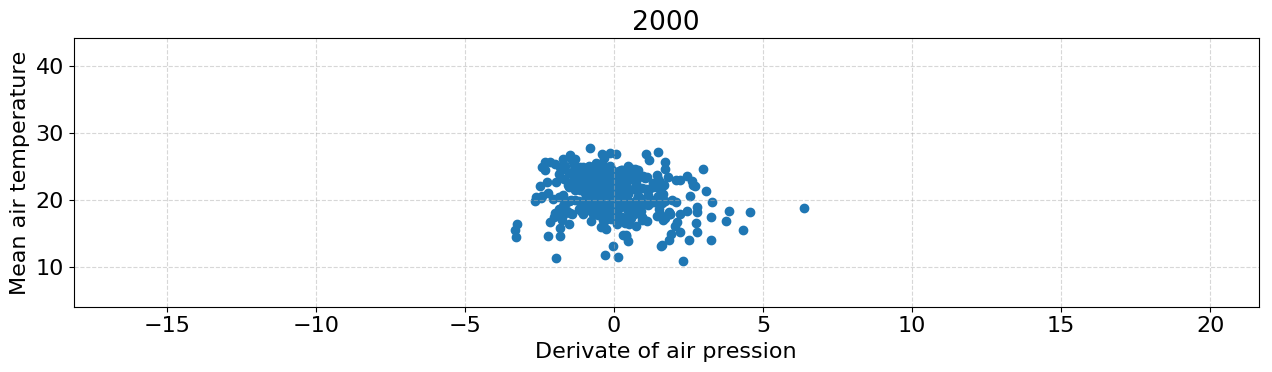

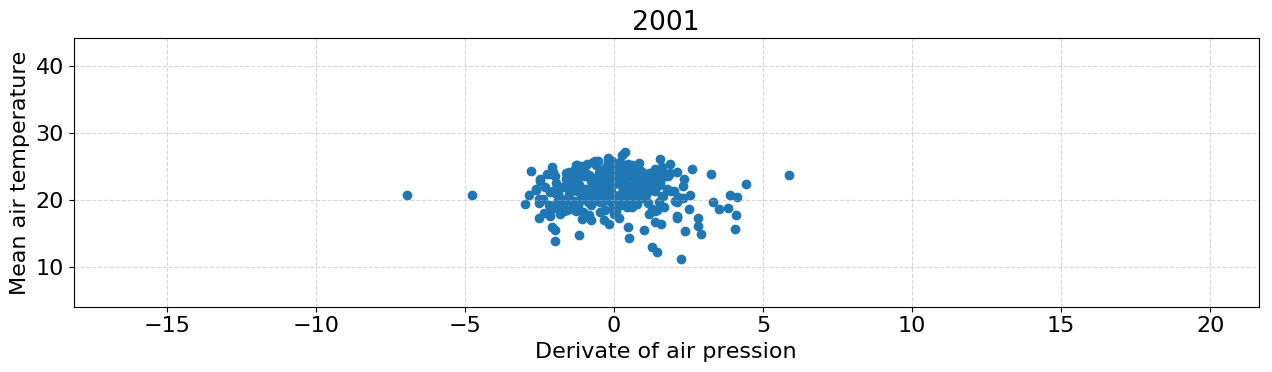

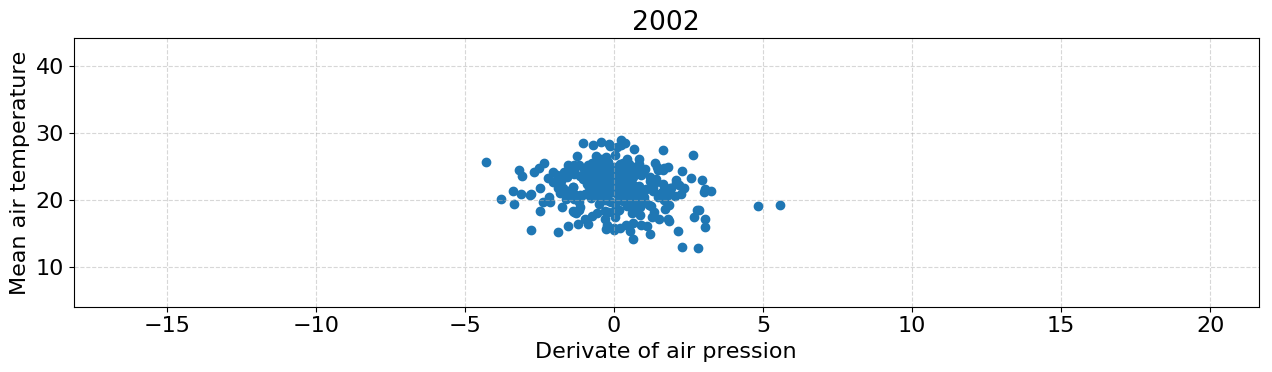

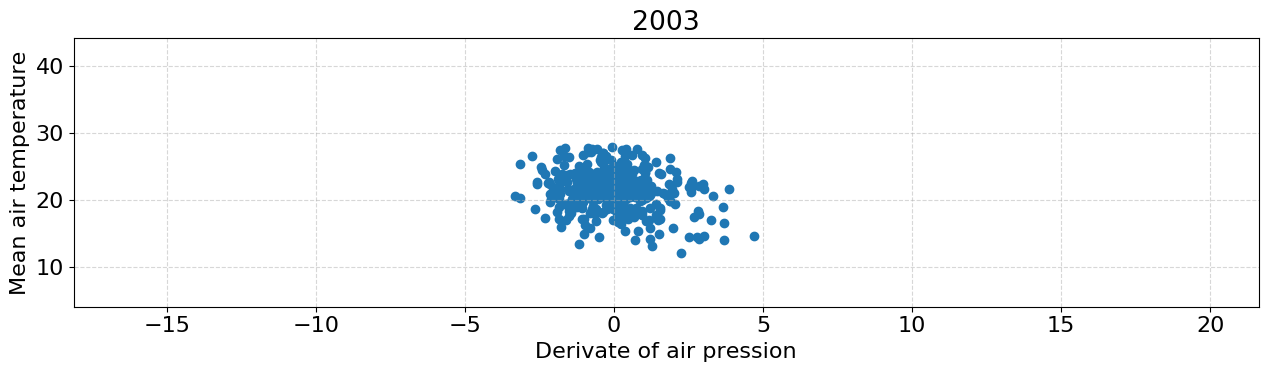

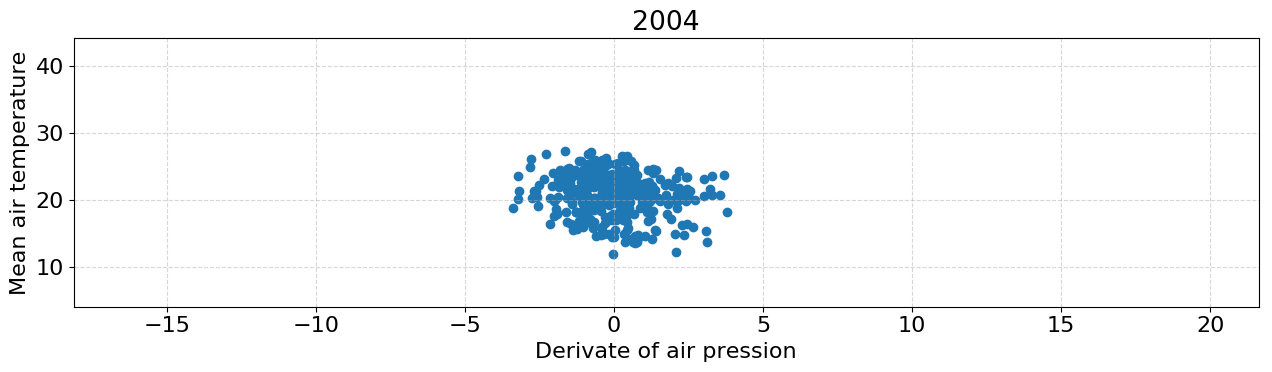

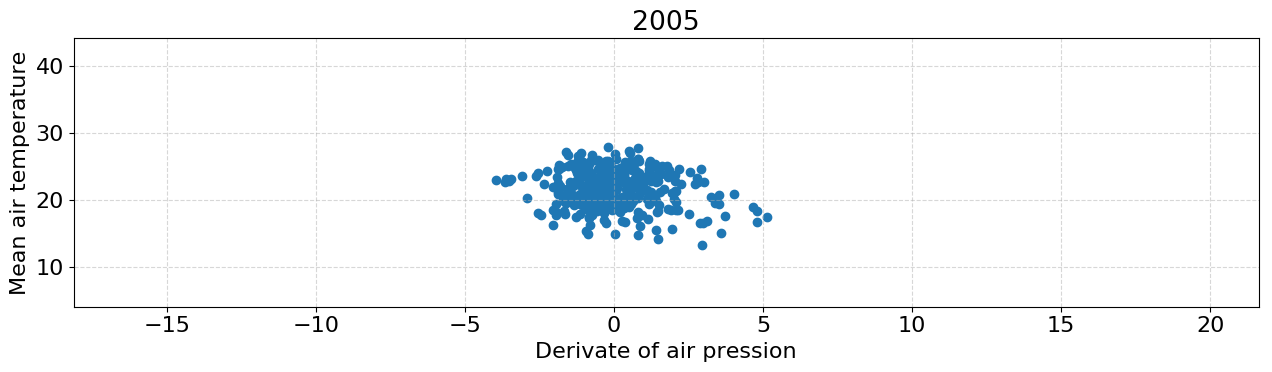

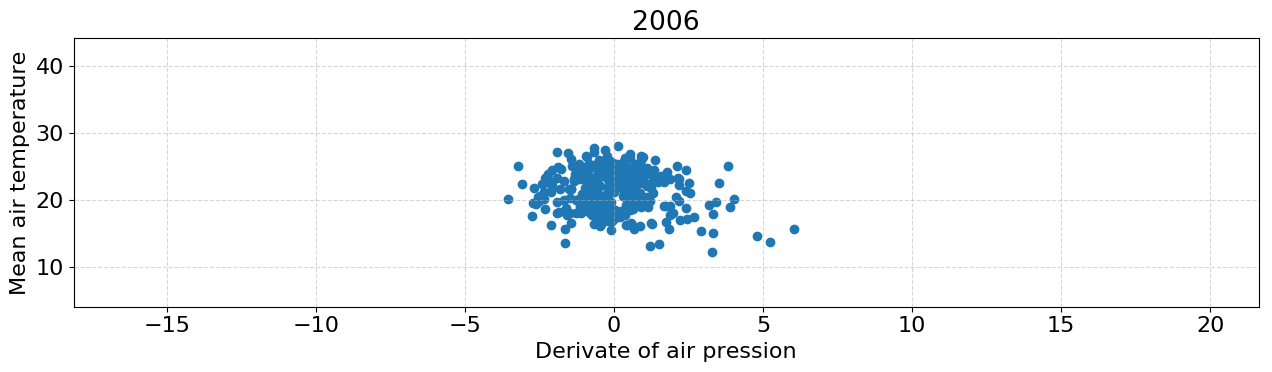

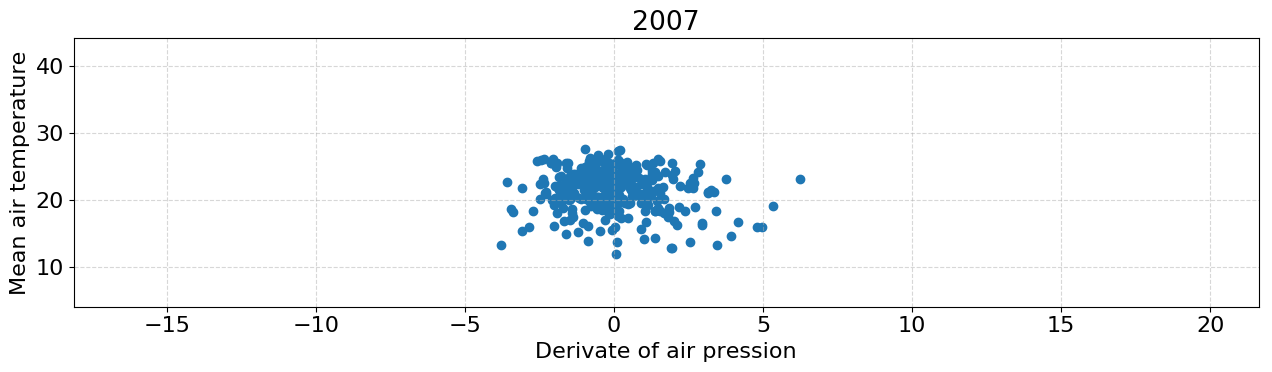

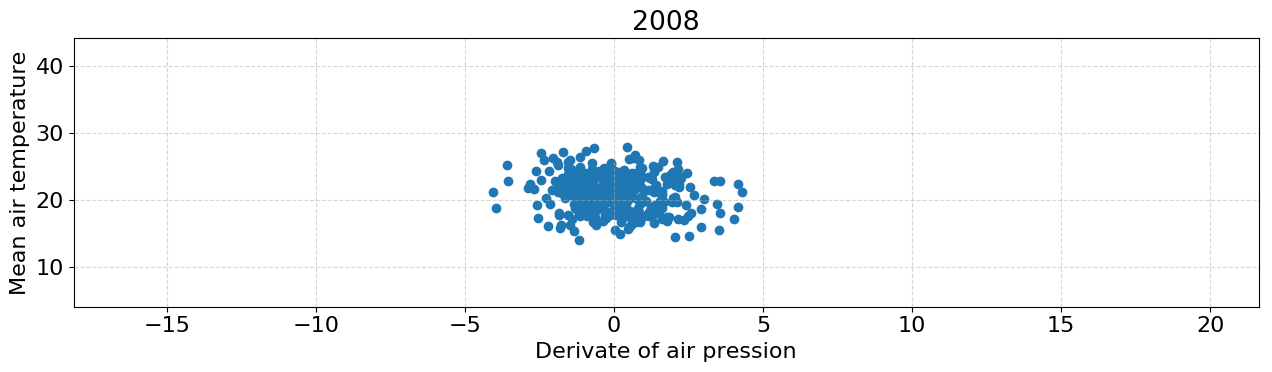

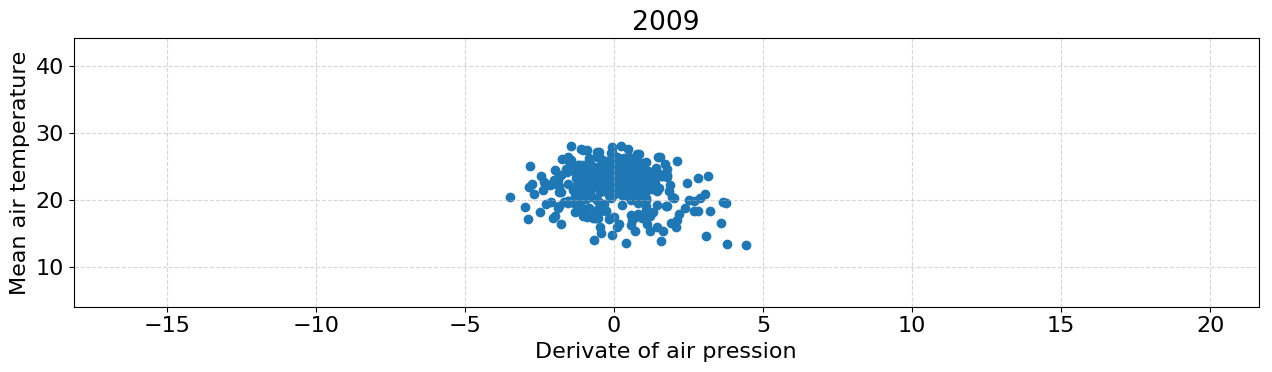

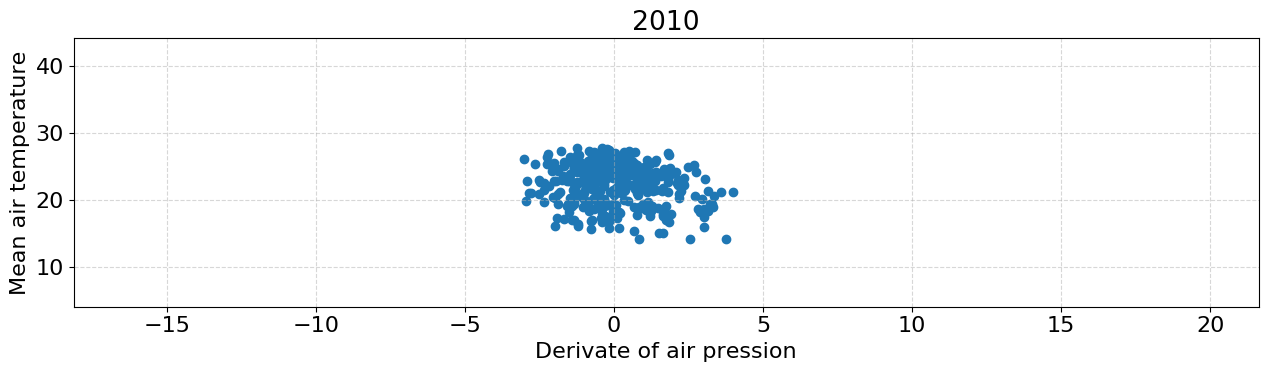

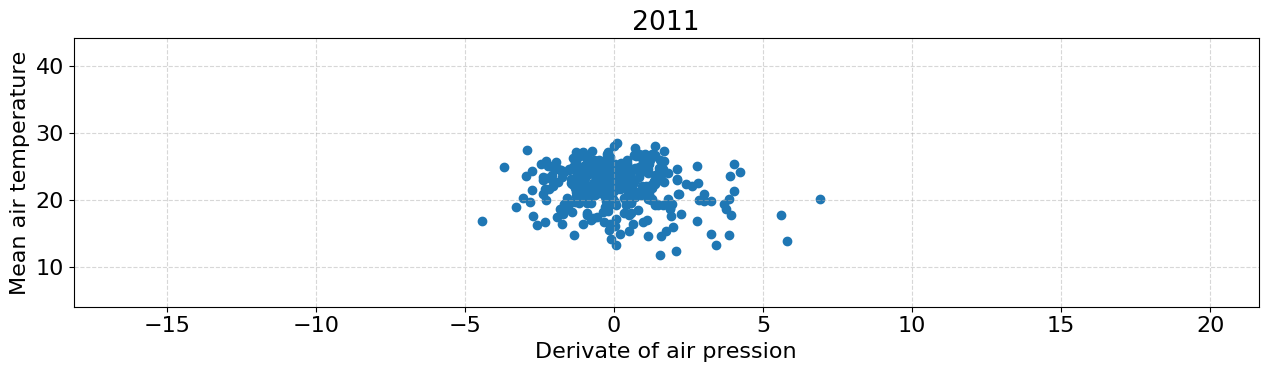

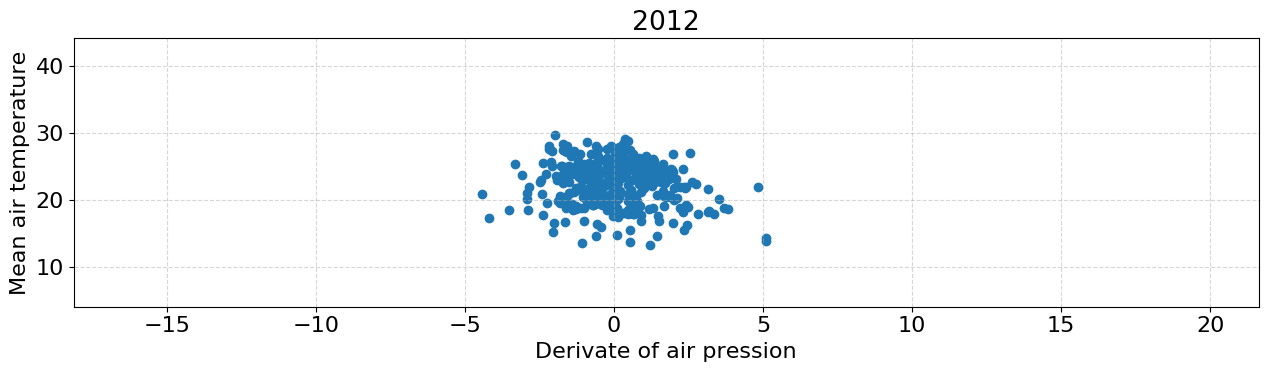

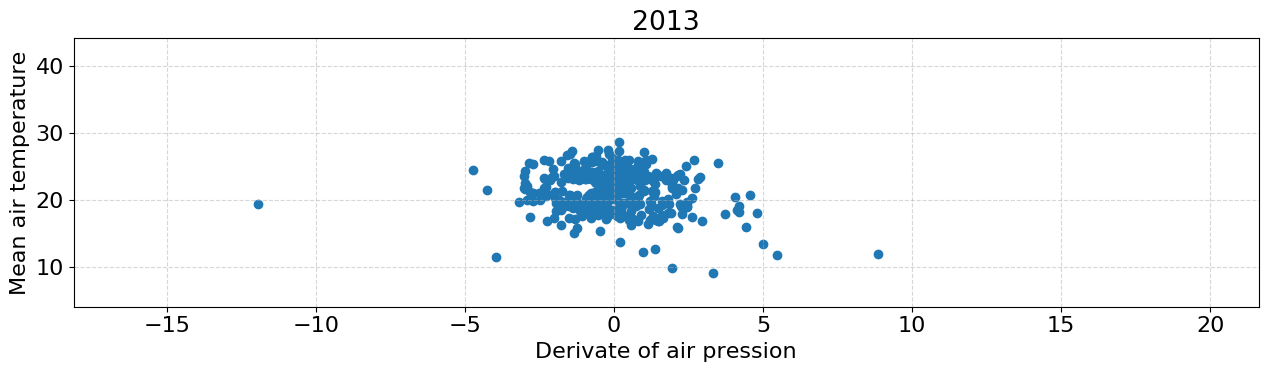

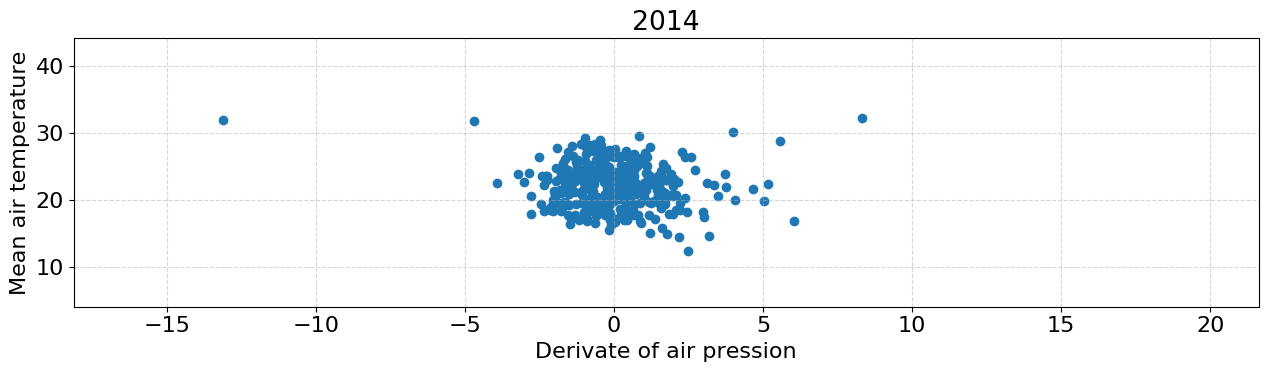

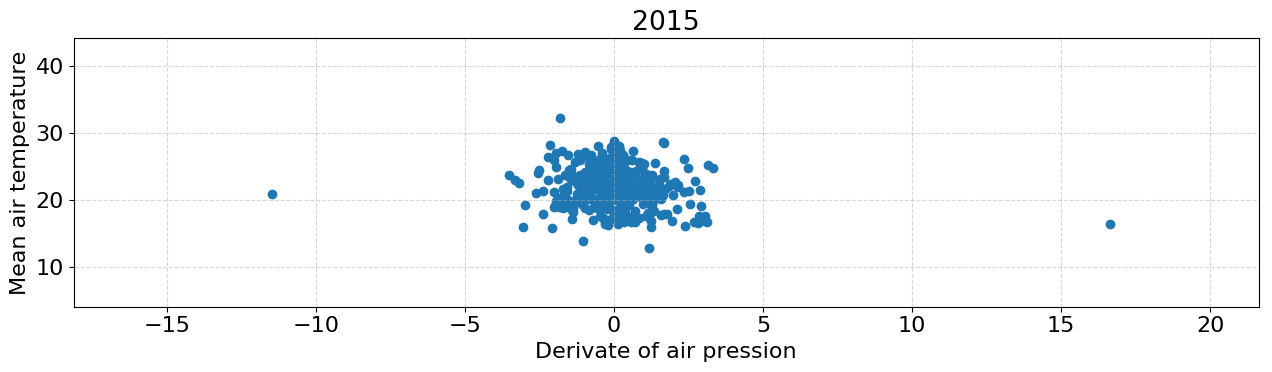

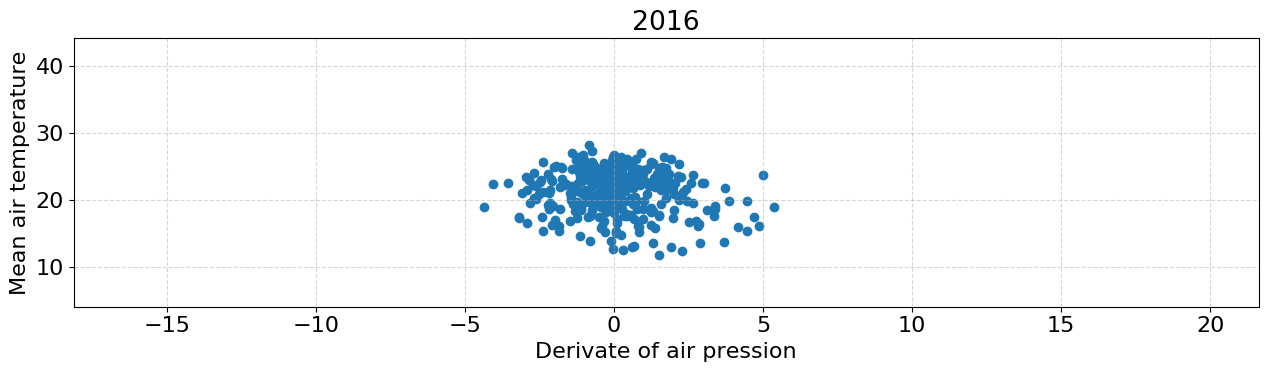

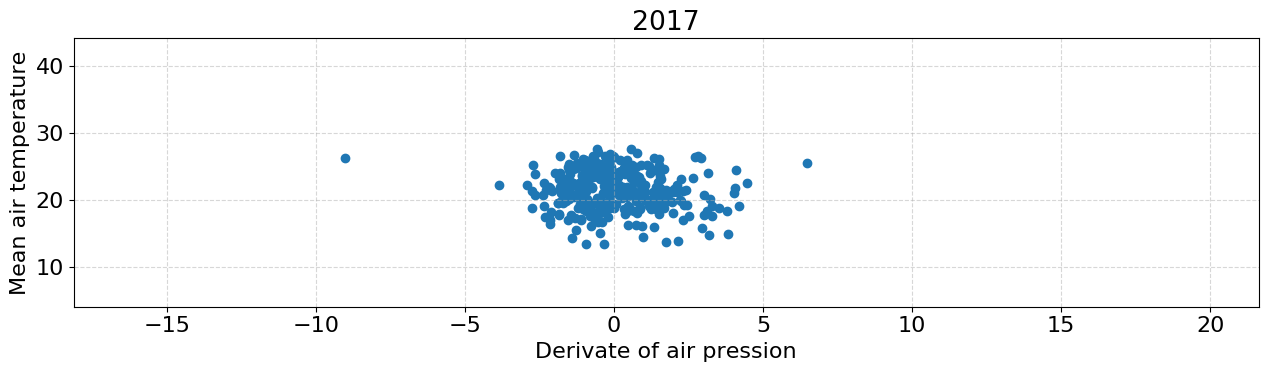

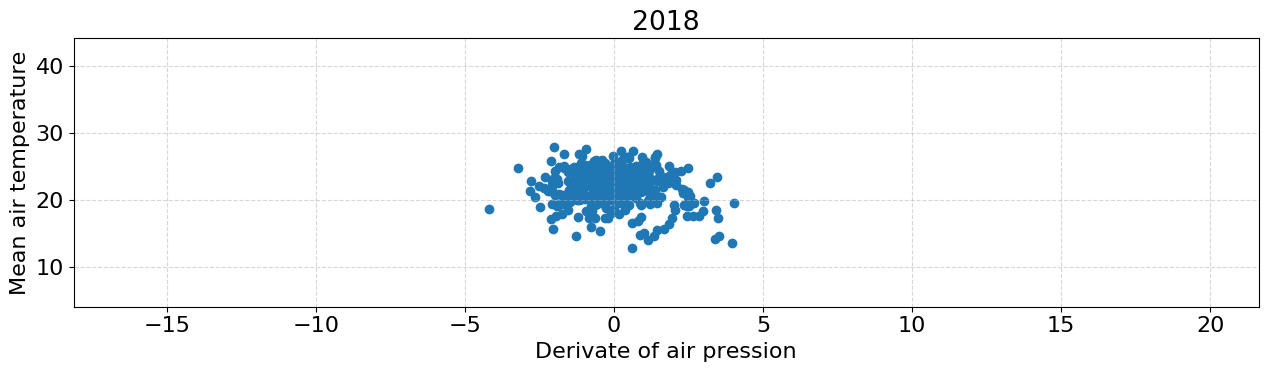

In [19]:
var1 = '2DERIVATE_MEAN_N_PRESSION_HPA'
var2 = 'MEAN_N_AIRTMP_MED10'

min_x_value = data[var1].min() - 5
max_x_value = data[var1].max() + 5

min_y_value = data[var2].min() - 5
max_y_value = data[var2].max() + 5

for i in data['YEAR'].unique():
    data_2plot = data[(data['YEAR'] == i)]

    plt.figure(figsize=(13,4))
    plt.title(str(i))    
    plt.scatter(data_2plot[var1], data_2plot[var2])
    plt.xlabel('Derivate of air pression')
    plt.ylabel('Mean air temperature')
    plt.grid(True, linestyle='--', alpha = 0.5)
    plt.xlim(min_x_value, max_x_value)
    plt.ylim(min_y_value, max_y_value)
    plt.show()

In [20]:
# Checking correlation

data[['1DERIVATE_MEAN_N_PRESSION_HPA','2DERIVATE_MEAN_N_PRESSION_HPA','MEAN_N_AIRTMP_MED10']].corr()

,1DERIVATE_MEAN_N_PRESSION_HPA,2DERIVATE_MEAN_N_PRESSION_HPA,MEAN_N_AIRTMP_MED10
1DERIVATE_MEAN_N_PRESSION_HPA,1.000000,-0.753304,-0.040893
2DERIVATE_MEAN_N_PRESSION_HPA,-0.753304,1.000000,-0.137530
MEAN_N_AIRTMP_MED10,-0.040893,-0.137530,1.000000


It doesn't seems to have a correlation between Pression variation and temperature at a first look

[Main menu](#0)

<a id='3'></a>